In [1]:
library('tidyverse')
library('readxl')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
exp_matrix <-
    read_xlsx('normalized raw chondrosarcoma.xlsx', sheet='TargetCountMatrix', skip=1)

exp_matrix %>%
    head()

TargetName,NMS23-471 | 001 | S100B,NMS23-471 | 002 | S100B,NMS23-471 | 003 | S100B,NMS23-471 | 004 | S100B,NMS23-471 | 005 | CD68,NMS23-471 | 005 | CD3,NMS23-471 | 006 | CD68,NMS23-471 | 006 | CD3,NMS23-471 | 007 | CD68,⋯,S10-479 | 013 | CD3,S10-479 | 013 | S100,S10-479 | 014 | CD68,S10-479 | 014 | CD3,S10-479 | 014 | S100,S10-479 | 015 | CD68,S10-479 | 015 | CD3,S10-479 | 015 | S100,S10-479 | 016 | CD68,S10-479 | 016 | CD3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RIPK1,1.3446108,1.965071,1.1286371,1.470146,1.615045,1.405978,1.615045,1.615045,1.855199,⋯,1.405978,1.3048955,1.281862,2.311079,2.4165559,1.444033,1.223975,1.405978,1.405978,1.489246
IL20RB,1.0793750,1.128637,0.8553470,1.223975,1.615045,1.405978,1.615045,1.615045,1.615045,⋯,1.615045,1.4534241,1.281862,1.615045,1.2239751,1.094372,1.405978,1.524744,1.223975,1.040725
VEGFA,1.4581924,1.489246,1.5247437,1.065532,1.615045,1.405978,1.615045,1.615045,1.855199,⋯,1.296464,0.9589023,1.281862,1.405978,1.2239751,1.257103,2.311079,1.524744,1.751471,1.489246
MUTYH,1.3446108,1.405978,0.9825357,1.223975,1.615045,1.405978,1.615045,1.615045,1.615045,⋯,1.405978,0.8456178,1.281862,1.405978,1.0655322,1.094372,1.405978,1.223975,1.405978,1.577444
CD48,0.8180133,1.128637,0.8553470,1.405978,1.615045,1.405978,1.615045,1.615045,1.615045,⋯,1.296464,1.3821764,1.472473,1.405978,0.9275997,1.094372,1.405978,1.615045,1.223975,1.577444
CDK6,1.6360265,1.128637,2.5660410,1.065532,1.615045,1.405978,1.615045,1.615045,1.615045,⋯,1.128637,1.3576251,1.281862,1.405978,0.9275997,4.377488,2.447950,2.447950,1.223975,3.122176


In [3]:
tumor_vs_peritumor <-
    read_xlsx('normalized raw chondrosarcoma.xlsx', sheet='TargetCountMatrix', n_max=1, col_names=paste('c', 1:141, sep='_')) %>%
    t()

tumor_vs_peritumor %>%
    head()

c_1,tumor
c_2,tumor
c_3,tumor
c_4,tumor
c_5,peritumor
c_6,peritumor


In [4]:
sample_annotations <-
    tibble(
        `sample_desc`=exp_matrix %>% select(-`TargetName`) %>% colnames(),
        `region_type`=tumor_vs_peritumor %>% as.vector()
    )

sample_annotations %>%
    head()

sample_desc,region_type
<chr>,<chr>
NMS23-471 | 001 | S100B,tumor
NMS23-471 | 002 | S100B,tumor
NMS23-471 | 003 | S100B,tumor
NMS23-471 | 004 | S100B,tumor
NMS23-471 | 005 | CD68,peritumor
NMS23-471 | 005 | CD3,peritumor


In [5]:
exp_tbl <-
    exp_matrix %>%
    pivot_longer(
        names_to='sample_desc',
        values_to='norm_exp',
        -`TargetName`
    ) %>%
    left_join(sample_annotations, by='sample_desc') %>%
    separate(`sample_desc`, c('sample_name', 'region_id', 'marker'), sep=' \\| ', remove=FALSE) %>%
    relocate(`region_type`, .after=`region_id`) %>%
    rename(`gene_symbol`=`TargetName`) %>%
    mutate(`marker`=case_when(
        `marker` == 'S100' ~ 'S100B',
        `marker` == 'DAPI' ~ 'S100B',
        TRUE ~ `marker`
    ))

exp_tbl %>%
    head()

gene_symbol,sample_desc,sample_name,region_id,region_type,marker,norm_exp
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
RIPK1,NMS23-471 | 001 | S100B,NMS23-471,001,tumor,S100B,1.344611
RIPK1,NMS23-471 | 002 | S100B,NMS23-471,002,tumor,S100B,1.965071
RIPK1,NMS23-471 | 003 | S100B,NMS23-471,003,tumor,S100B,1.128637
RIPK1,NMS23-471 | 004 | S100B,NMS23-471,004,tumor,S100B,1.470146
RIPK1,NMS23-471 | 005 | CD68,NMS23-471,005,peritumor,CD68,1.615045
RIPK1,NMS23-471 | 005 | CD3,NMS23-471,005,peritumor,CD3,1.405978


In [6]:
exp_tbl %>%
    distinct(`gene_symbol`) %>%
    pull() %>%
    sort()

[1] "A2M"            "ABCB1"          "ABCF1"          "ABL1"          
   [5] "ACOT12"         "ACSF3"          "ACTA2"          "ACTB"          
   [9] "ACTR3B"         "ACVR1B"         "ACVR1C"         "ACVR2A"        
  [13] "ACY1"           "ADA"            "ADAM12"         "ADGRE1"        
  [17] "ADGRE5"         "ADH1A/B/C"      "ADH4"           "ADH6"          
  [21] "ADM"            "ADORA2A"        "AFDN"           "AICDA"         
  [25] "AIRE"           "AKAP1"          "AKR1C4"         "AKT1"          
  [29] "AKT2"           "AKT3"           "ALCAM"          "ALDOA"         
  [33] "ALDOC"          "ALK"            "ALKBH2"         "ALKBH3"        
  [37] "AMBP"           "AMER1"          "AMH"            "ANGPT1"        
  [41] "ANGPT2"         "ANGPTL4"        "ANKRD28"        "ANLN"          
  [45] "ANP32B"         "ANXA1"          "APC"            "APH1B"         
  [49] "API5"           "APLNR"          "APOA1"          "APOA2"         
  [53] "APOA4"          "APOB"           "APOC2"          "APOC3"         
  [57] "APOE"           "APOL6"          "APOM"           "APP"           
  [61] "AQP9"           "AR"             "AREG"           "ARG1"          
  [65] "ARG2"           "ARID1A"         "ARID1B"         "ARID2"         
  [69] "ARMH3"          "ARNT"           "ARNT2"          "ASCL1"         
  [73] "ASL"            "ASNS"           "ASPA"           "ASPG"          
  [77] "ASXL1"          "ATF1"           "ATF2"           "ATF3"          
  [81] "ATG10"          "ATG12"          "ATG16L1"        "ATG5"          
  [85] "ATG7"           "ATM"            "ATOX1"          "ATP11C"        
  [89] "ATP2A2"         "ATP5F1D"        "ATP5ME"         "ATR"           
  [93] "ATRX"           "AURKA"          "AURKB"          "AXIN1"         
  [97] "AXIN2"          "AXL"            "B2M"            "BAD"           
 [101] "BAG1"           "BAGE"           "BAIAP3"         "BAMBI"         
 [105] "BAP1"           "BATF"           "BATF3"          "BAX"           
 [109] "BBC3"           "BBS1"           "BCAT1"          "BCL10"         
 [113] "BCL2"           "BCL2A1"         "BCL2L1"         "BCL6"          
 [117] "BCL6B"          "BCOR"           "BDNF"           "BID"           
 [121] "BIRC3"          "BIRC5"          "BIRC7"          "BLK"           
 [125] "BLM"            "BLNK"           "BLVRA"          "BMI1"          
 [129] "BMP2"           "BMP4"           "BMP5"           "BMP6"          
 [133] "BMP7"           "BMP8A"          "BMPR1B"         "BNIP3"         
 [137] "BNIP3L"         "BRAF"           "BRCA1"          "BRCA2"         
 [141] "BRD2"           "BRD3"           "BRD4"           "BRD7"          
 [145] "BRIP1"          "BST1"           "BST2"           "BTK"           
 [149] "BTLA"           "C1QA"           "C1QB"           "C1QBP"         
 [153] "C1R"            "C1S"            "C2"             "C3"            
 [157] "C3AR1"          "C4B"            "C4BPA"          "C5"            
 [161] "C5AR1"          "C6"             "C7"             "C8A"           
 [165] "C8B"            "C8G"            "C9"             "CACNA1C"       
 [169] "CACNA1D"        "CACNA1E"        "CACNA1G"        "CACNA1H"       
 [173] "CACNA2D1"       "CACNA2D2"       "CACNA2D3"       "CACNA2D4"      
 [177] "CACNB2"         "CACNB3"         "CACNB4"         "CACNG1"        
 [181] "CACNG4"         "CACNG6"         "CALML3"         "CALML5"        
 [185] "CALML6"         "CAMK2B"         "CAMP"           "CAPN2"         
 [189] "CARD11"         "CARD9"          "CASP1"          "CASP10"        
 [193] "CASP12"         "CASP3"          "CASP7"          "CASP8"         
 [197] "CASP9"          "CBL"            "CBLC"           "CCL1"          
 [201] "CCL11"          "CCL13"          "CCL14"          "CCL15"         
 [205] "CCL16"          "CCL17"          "CCL18"          "CCL19"         
 [209] "CCL2"           "CCL20"          "CCL21"          "CCL22"         
 [213] "CCL23"          "CCL

In [7]:
exp_tbl %>%
    distinct(`gene_symbol`) %>%
    filter(str_detect(`gene_symbol`, '^TR')) %>%
    pull() %>%
    sort()

[1] "TRAC"       "TRAF1"      "TRAF2"      "TRAF3"      "TRAF6"     
  [6] "TRAF7"      "TRAJ10"     "TRAJ11"     "TRAJ12"     "TRAJ13"    
 [11] "TRAJ14"     "TRAJ15"     "TRAJ16"     "TRAJ17"     "TRAJ18"    
 [16] "TRAJ20"     "TRAJ21"     "TRAJ22"     "TRAJ23"     "TRAJ26"    
 [21] "TRAJ27"     "TRAJ28"     "TRAJ29"     "TRAJ3"      "TRAJ30"    
 [26] "TRAJ31"     "TRAJ32"     "TRAJ34"     "TRAJ35"     "TRAJ36"    
 [31] "TRAJ37"     "TRAJ38"     "TRAJ39"     "TRAJ40"     "TRAJ41"    
 [36] "TRAJ42"     "TRAJ43"     "TRAJ45"     "TRAJ46"     "TRAJ47"    
 [41] "TRAJ48"     "TRAJ49"     "TRAJ5"      "TRAJ50"     "TRAJ52"    
 [46] "TRAJ53"     "TRAJ54"     "TRAJ56"     "TRAJ57"     "TRAJ6"     
 [51] "TRAJ7"      "TRAJ9"      "TRAT1"      "TRAT1_CTL"  "TRAV1-1"   
 [56] "TRAV1-2"    "TRAV10"     "TRAV12-1"   "TRAV12-2"   "TRAV12-3"  
 [61] "TRAV13-1"   "TRAV13-2"   "TRAV14"     "TRAV16"     "TRAV17"    
 [66] "TRAV18"     "TRAV19"     "TRAV2"      "TRAV20"     "TRAV21"    
 [71] "TRAV22"     "TRAV23"     "TRAV24"     "TRAV25"     "TRAV26-1"  
 [76] "TRAV26-2"   "TRAV27"     "TRAV29"     "TRAV30"     "TRAV34"    
 [81] "TRAV36"     "TRAV38-1/2" "TRAV39"     "TRAV4"      "TRAV40"    
 [86] "TRAV41"     "TRAV5"      "TRAV6"      "TRAV7"      "TRAV8-1"   
 [91] "TRAV8-3"    "TRAV8-6"    "TRAV9-1"    "TRAV9-2"    "TRBC1/2"   
 [96] "TRBJ1-1"    "TRBJ1-2"    "TRBJ1-3"    "TRBJ1-4"    "TRBV10-2"  
[101] "TRBV10-3"   "TRBV11-1"   "TRBV11-2"   "TRBV11-3"   "TRBV12-3"  
[106] "TRBV12-4"   "TRBV12-5"   "TRBV13"     "TRBV14"     "TRBV15"    
[111] "TRBV18"     "TRBV19"     "TRBV2"      "TRBV20-1"   "TRBV24-1"  
[116] "TRBV25-1"   "TRBV27"     "TRBV28"     "TRBV29-1"   "TRBV3-1"   
[121] "TRBV4-1"    "TRBV4-2"    "TRBV4-3"    "TRBV5-1"    "TRBV5-4"   
[126] "TRBV5-5"    "TRBV5-6"    "TRBV5-8"    "TRBV6-1"    "TRBV6-2/3" 
[131] "TRBV6-4"    "TRBV6-5"    "TRBV6-6"    "TRBV6-8"    "TRBV7-6"   
[136] "TRBV7-7"    "TRBV7-8"    "TRBV7-9"    "TRBV9"      "TRDC"      
[141] "TRDJ1"      "TRDJ2"      "TRDJ3"      "TRDJ4"      "TRDV1"     
[146] "TRDV2"      "TRDV3"      "TREM1"      "TREM2"      "TRGJ1/2"   
[151] "TRGJP"      "TRGJP1"     "TRGJP2"     "TRGV2"      "TRGV4"     
[156] "TRGV5"      "TRGV8"      "TRGV9"      "TRIM21"

In [8]:
sample_manifest <-
    exp_tbl %>%
    distinct(`sample_desc`, `sample_name`, `region_id`, `region_type`, `marker`)

sample_manifest

sample_desc,sample_name,region_id,region_type,marker
<chr>,<chr>,<chr>,<chr>,<chr>
NMS23-471 | 001 | S100B,NMS23-471,001,tumor,S100B
NMS23-471 | 002 | S100B,NMS23-471,002,tumor,S100B
NMS23-471 | 003 | S100B,NMS23-471,003,tumor,S100B
NMS23-471 | 004 | S100B,NMS23-471,004,tumor,S100B
NMS23-471 | 005 | CD68,NMS23-471,005,peritumor,CD68
NMS23-471 | 005 | CD3,NMS23-471,005,peritumor,CD3
NMS23-471 | 006 | CD68,NMS23-471,006,peritumor,CD68
NMS23-471 | 006 | CD3,NMS23-471,006,peritumor,CD3
NMS23-471 | 007 | CD68,NMS23-471,007,peritumor,CD68


In [9]:
sample_manifest %>%
    count(`marker`)

marker,n
<chr>,<int>
CD3,54
CD68,52
S100B,35


In [10]:
sample_manifest %>%
    count(`sample_name`)

sample_name,n
<chr>,<int>
NMS22-289343,38
NMS23-471,34
S08-25548,32
S10-479,37


In [11]:
sample_manifest %>%
    count(`marker`, `region_type`)

marker,region_type,n
<chr>,<chr>,<int>
CD3,peritumor,48
CD3,tumor,6
CD68,peritumor,47
CD68,tumor,5
S100B,peritumor,16
S100B,tumor,19


In [12]:
sample_manifest %>%
    count(`sample_name`, `region_type`)

sample_name,region_type,n
<chr>,<chr>,<int>
NMS22-289343,peritumor,26
NMS22-289343,tumor,12
NMS23-471,peritumor,30
NMS23-471,tumor,4
S08-25548,peritumor,27
S08-25548,tumor,5
S10-479,peritumor,28
S10-479,tumor,9


In [13]:
sample_manifest %>%
    count(`sample_name`, `marker`, `region_type`)

sample_name,marker,region_type,n
<chr>,<chr>,<chr>,<int>
NMS22-289343,CD3,peritumor,12
NMS22-289343,CD3,tumor,3
NMS22-289343,CD68,peritumor,12
NMS22-289343,CD68,tumor,3
NMS22-289343,S100B,peritumor,2
NMS22-289343,S100B,tumor,6
NMS23-471,CD3,peritumor,15
NMS23-471,CD68,peritumor,15
NMS23-471,S100B,tumor,4


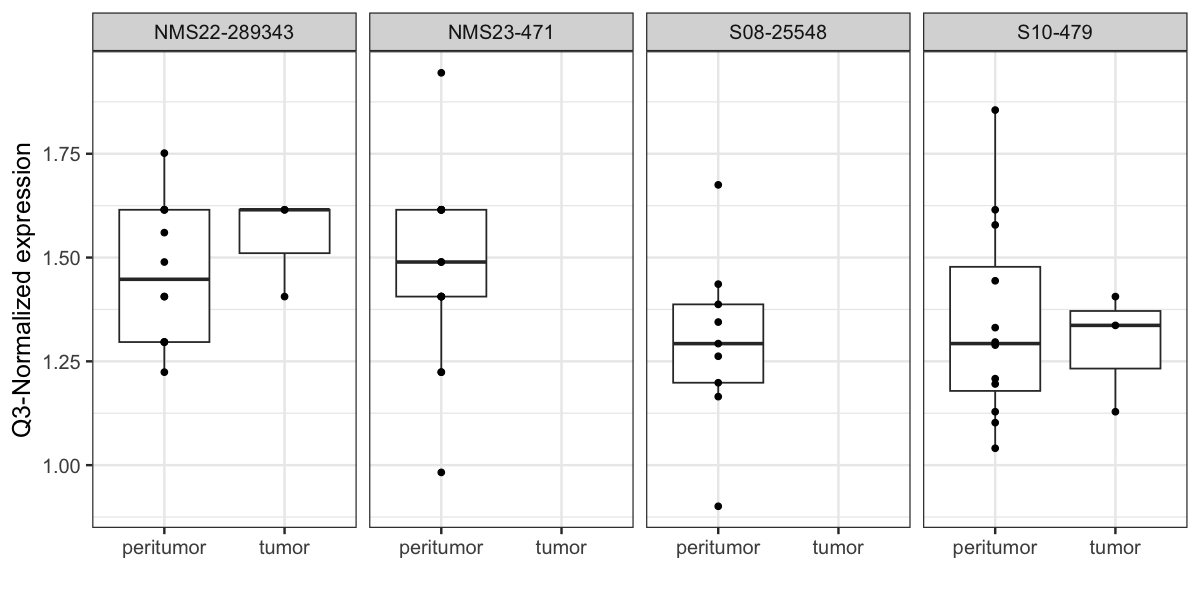

In [14]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` == 'CD8A',
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_wrap(~`sample_name`, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

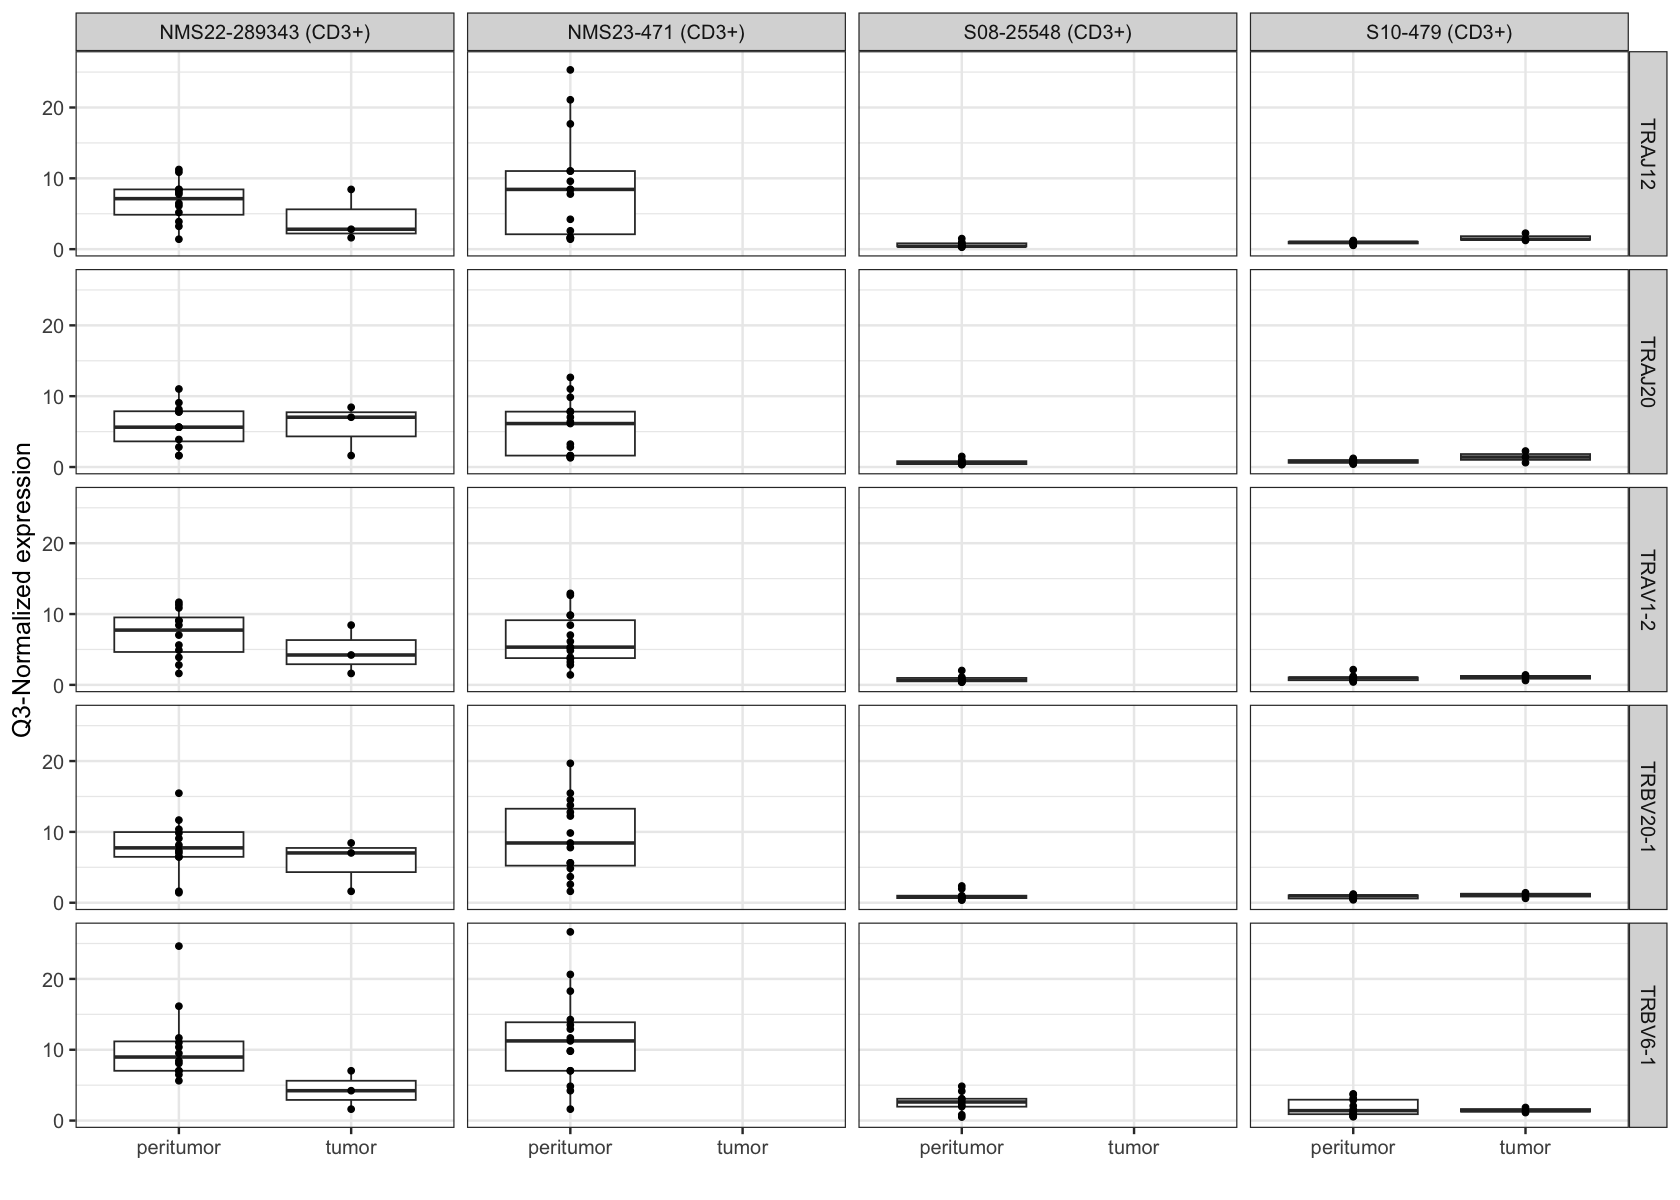

In [15]:
options(repr.plot.width=14, repr.plot.height=10)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TRAJ12', 'TRAJ20', 'TRAJ33', 'TRAV1-2', 'TRBV20-1', 'TRBV6-1'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

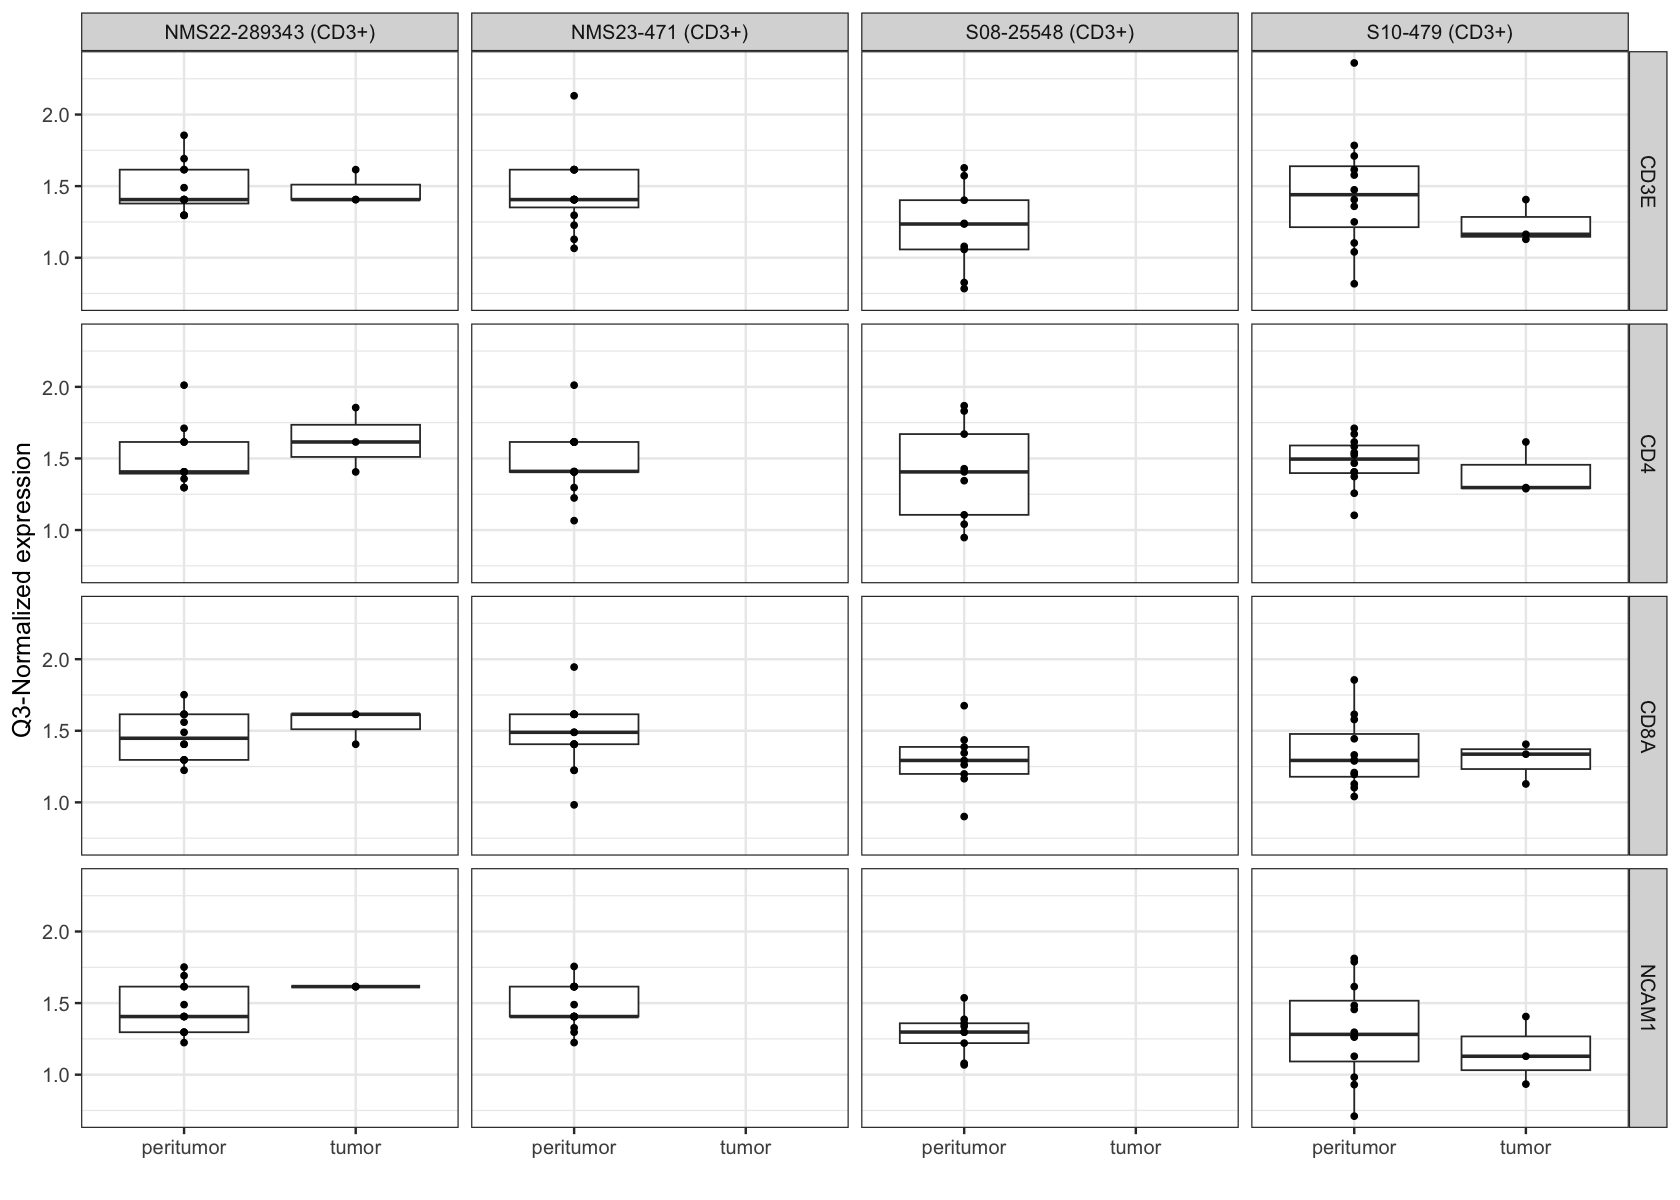

In [16]:
options(repr.plot.width=14, repr.plot.height=10)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('CD3E', 'CD8A', 'CD4', 'NCAM1'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

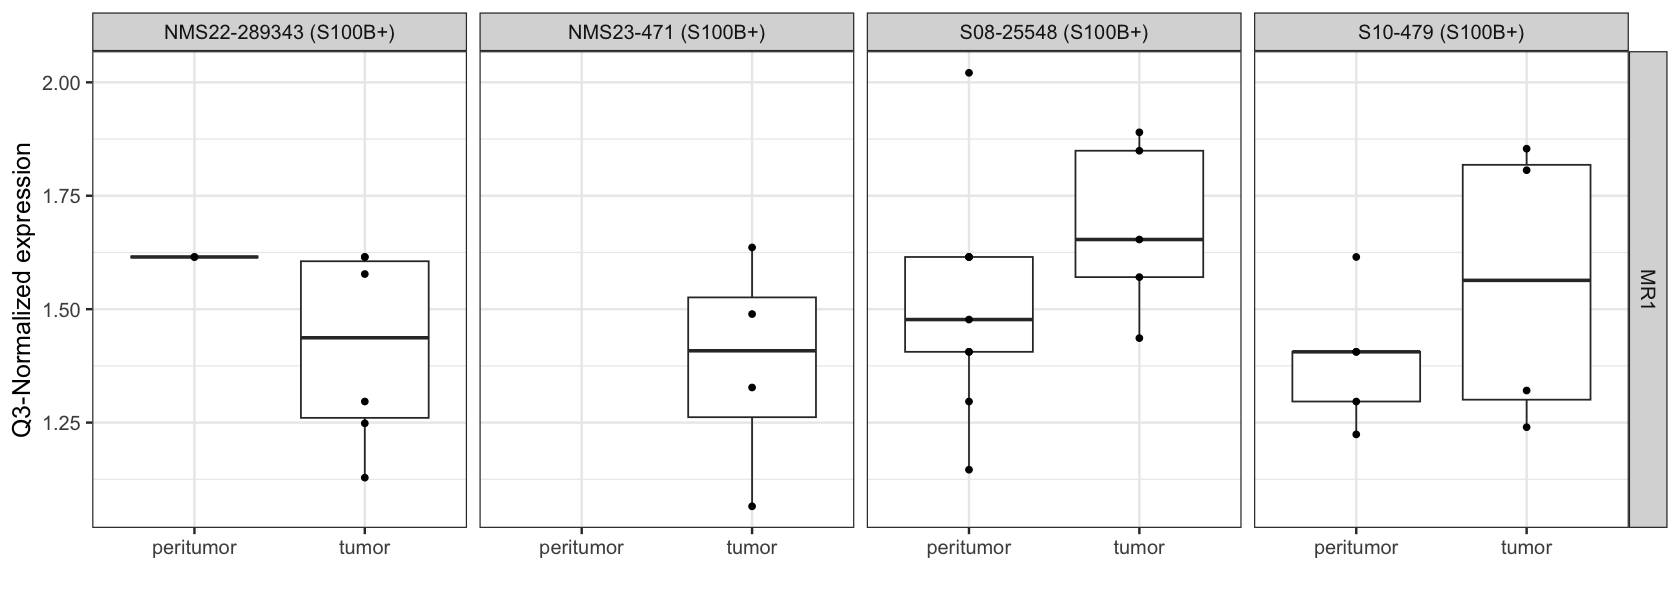

In [17]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('MR1'),
        `marker` == 'S100B'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

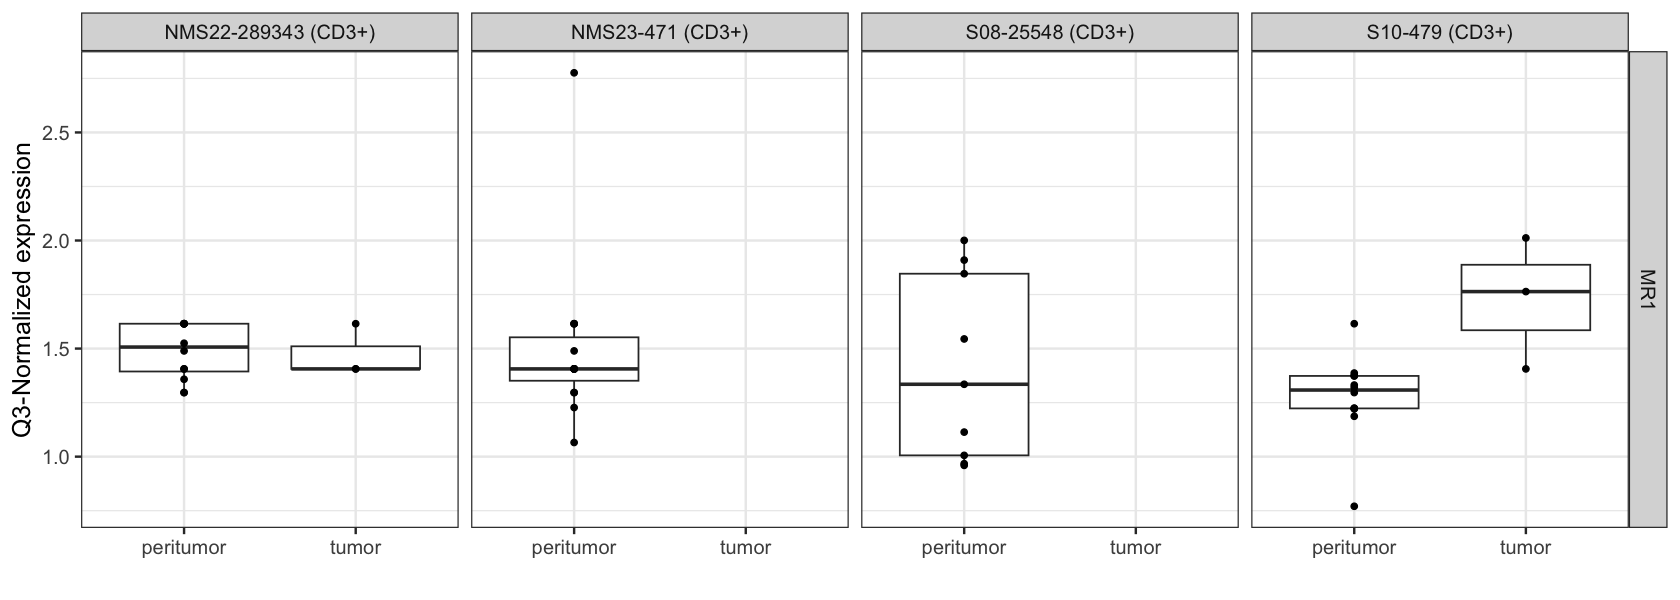

In [18]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('MR1'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

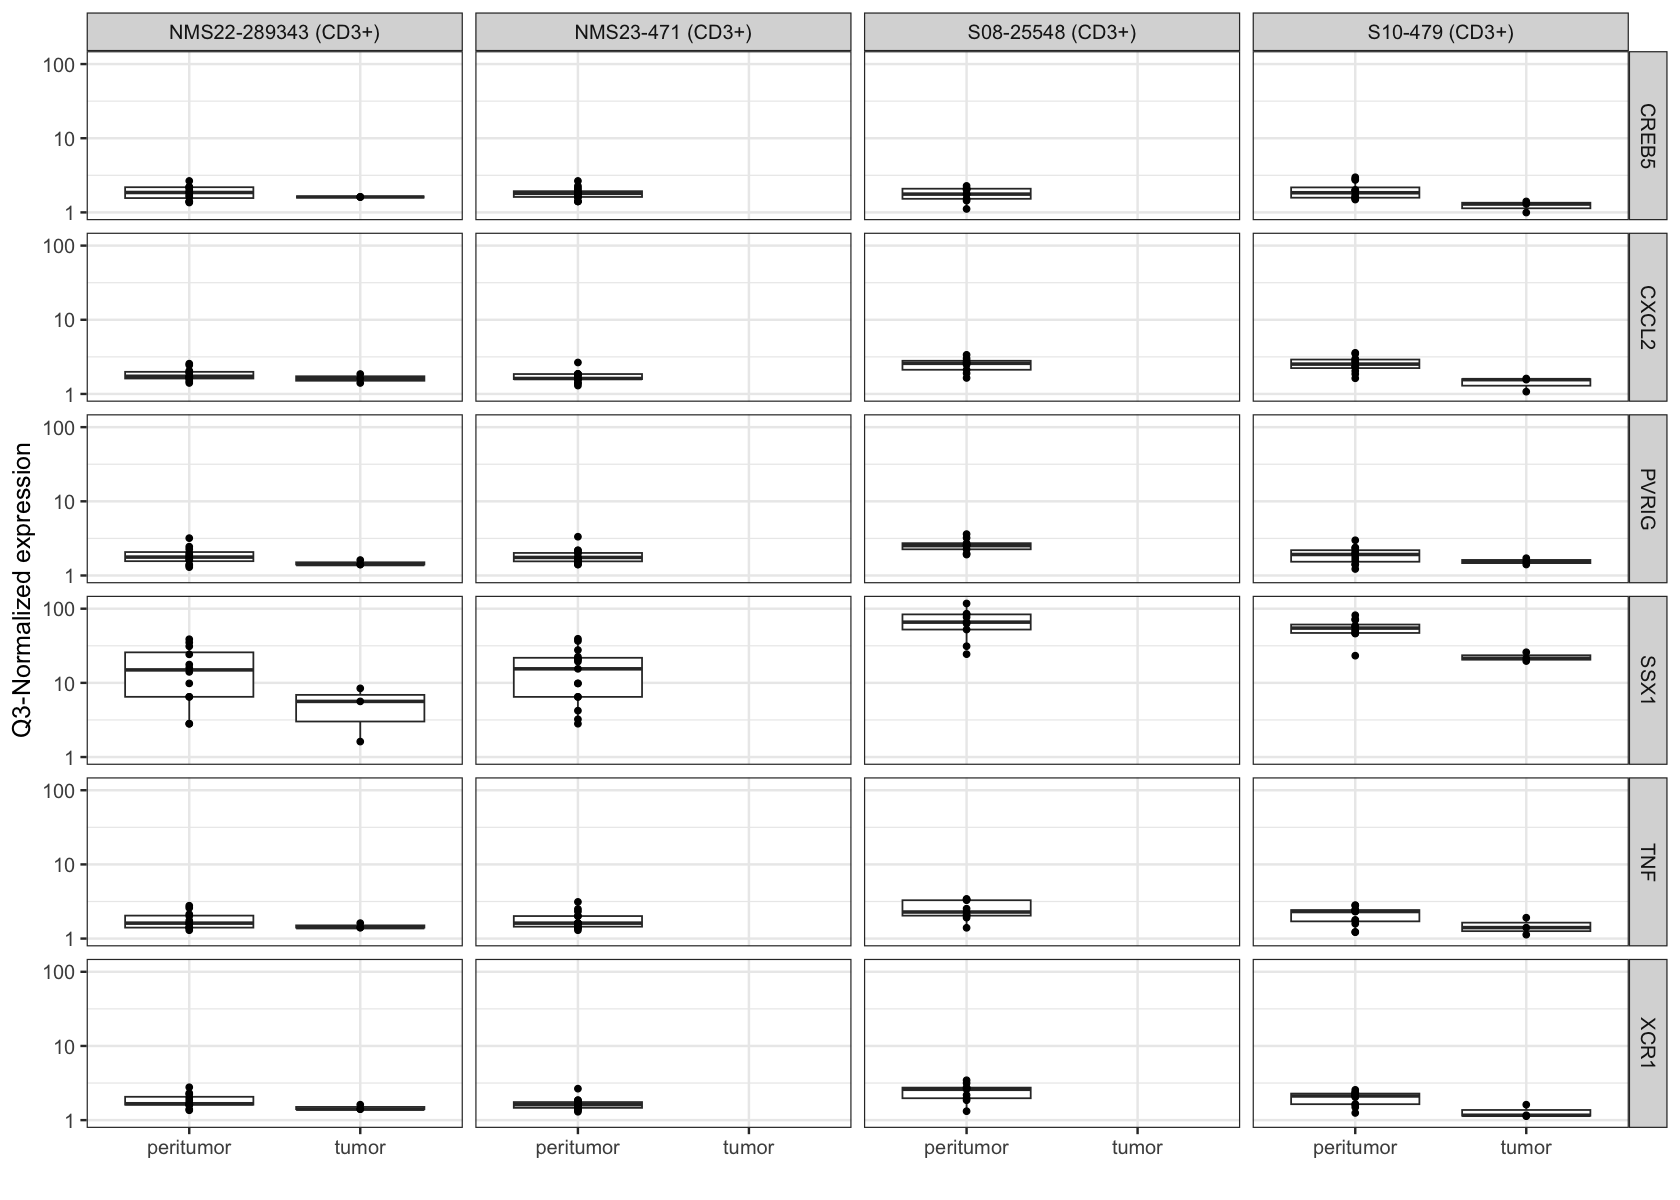

In [19]:
options(repr.plot.width=14, repr.plot.height=10)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('XCR1', 'SSX1', 'CXCL2', 'CREB5', 'TNF', 'PVRIG'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        scale_y_log10() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

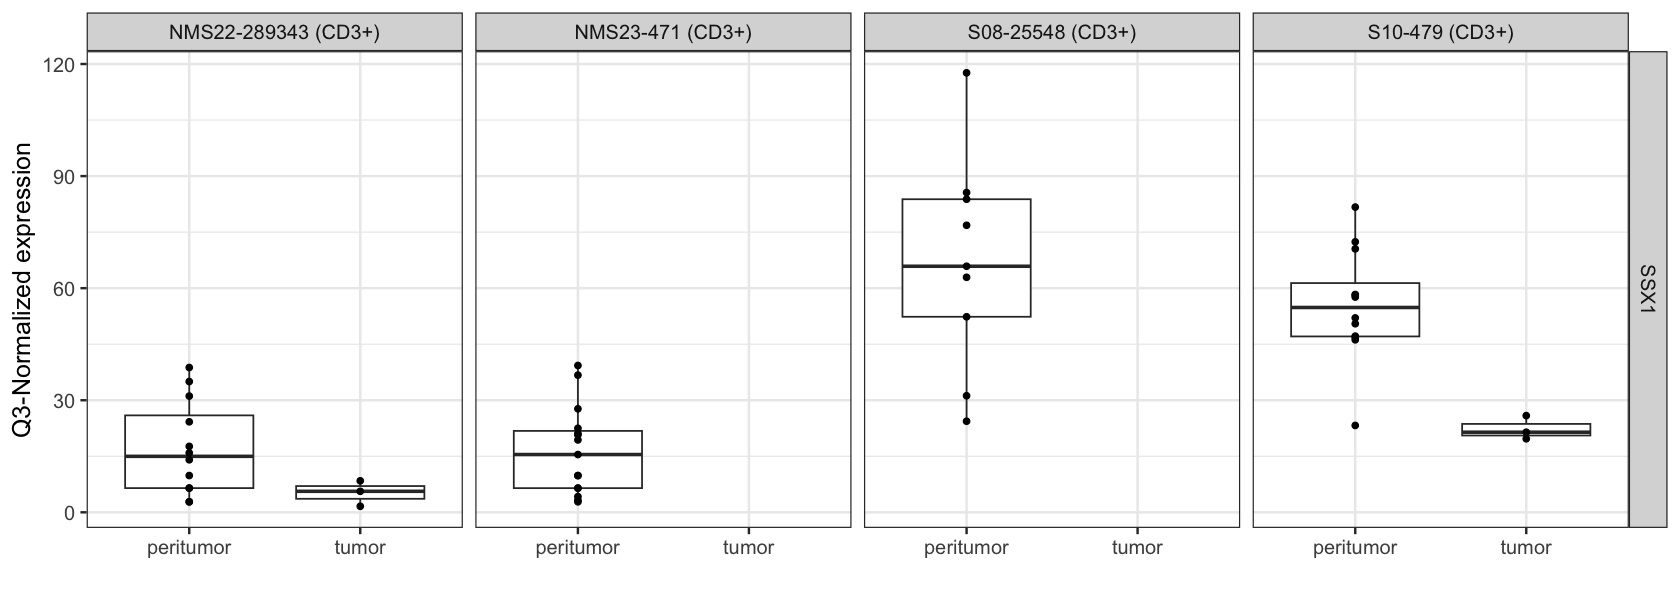

In [20]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('SSX1'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

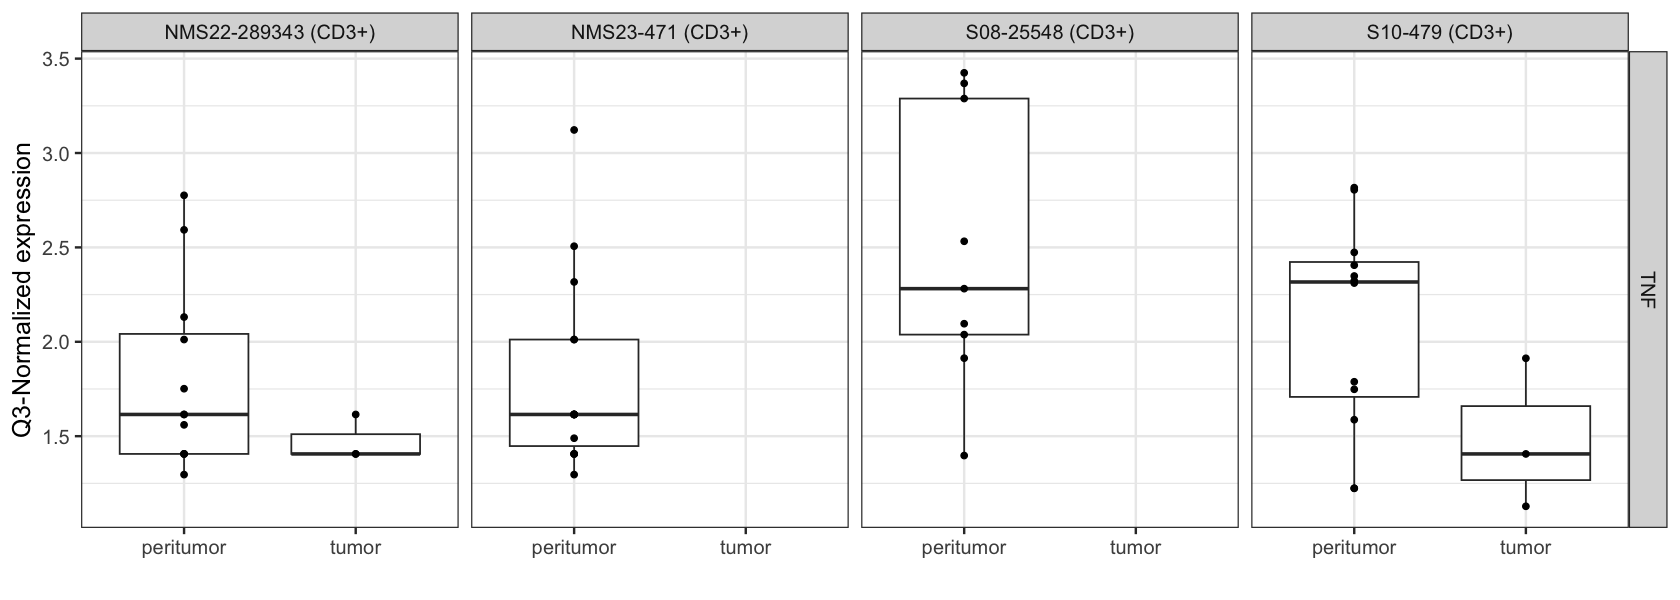

In [21]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TNF'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

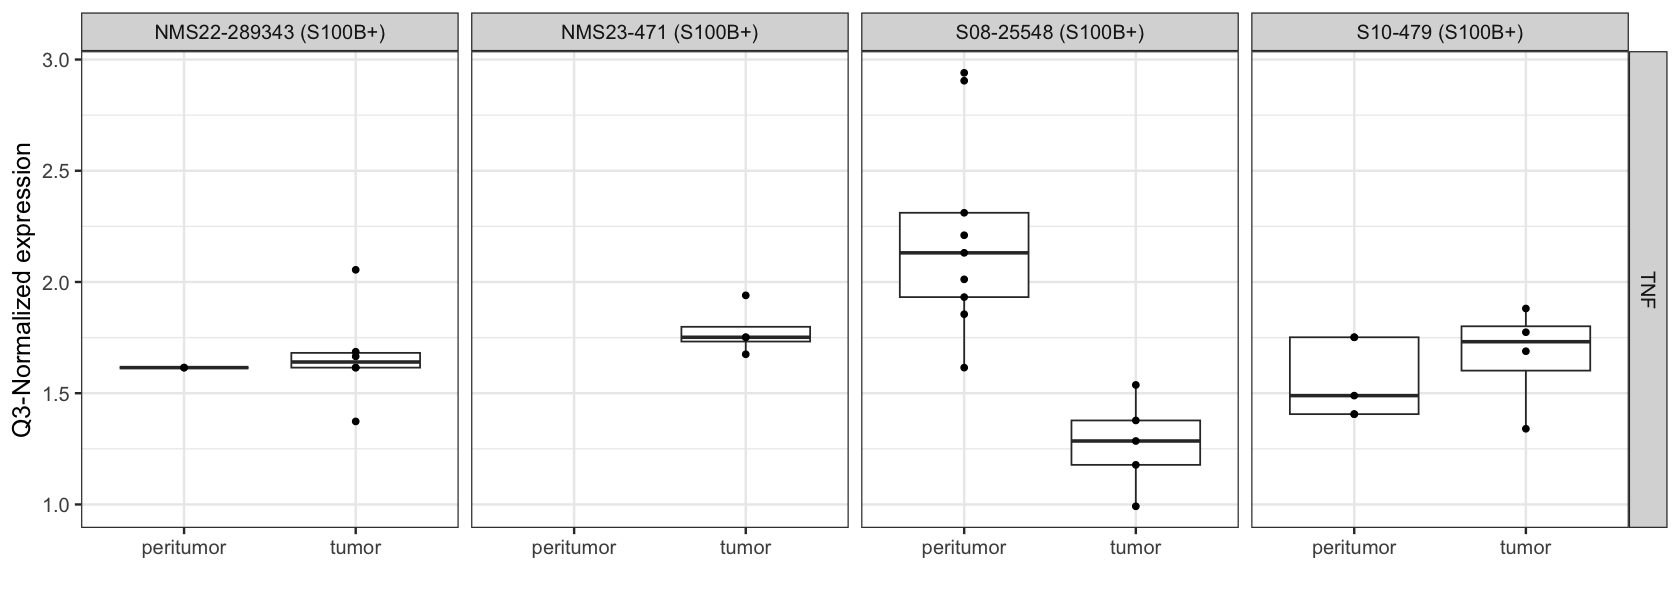

In [22]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TNF'),
        `marker` == 'S100B'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

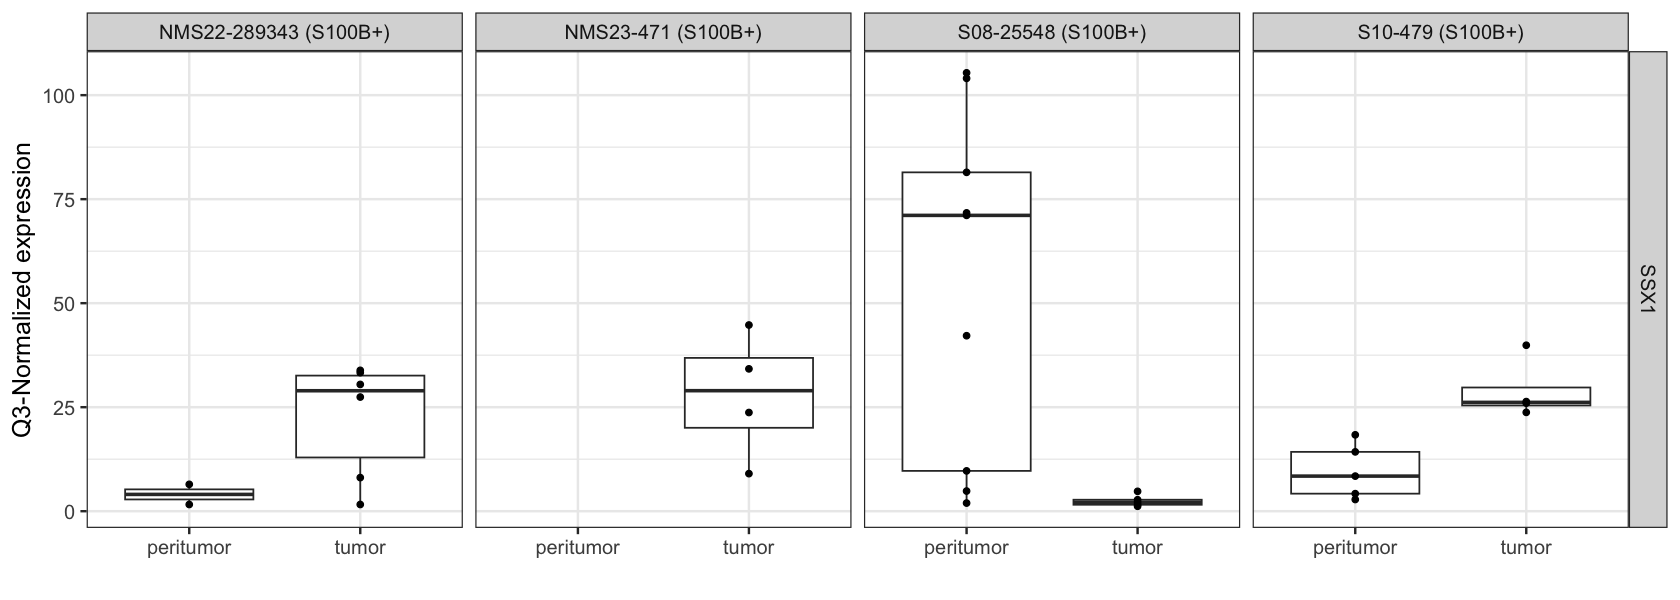

In [23]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('SSX1'),
        `marker` == 'S100B'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

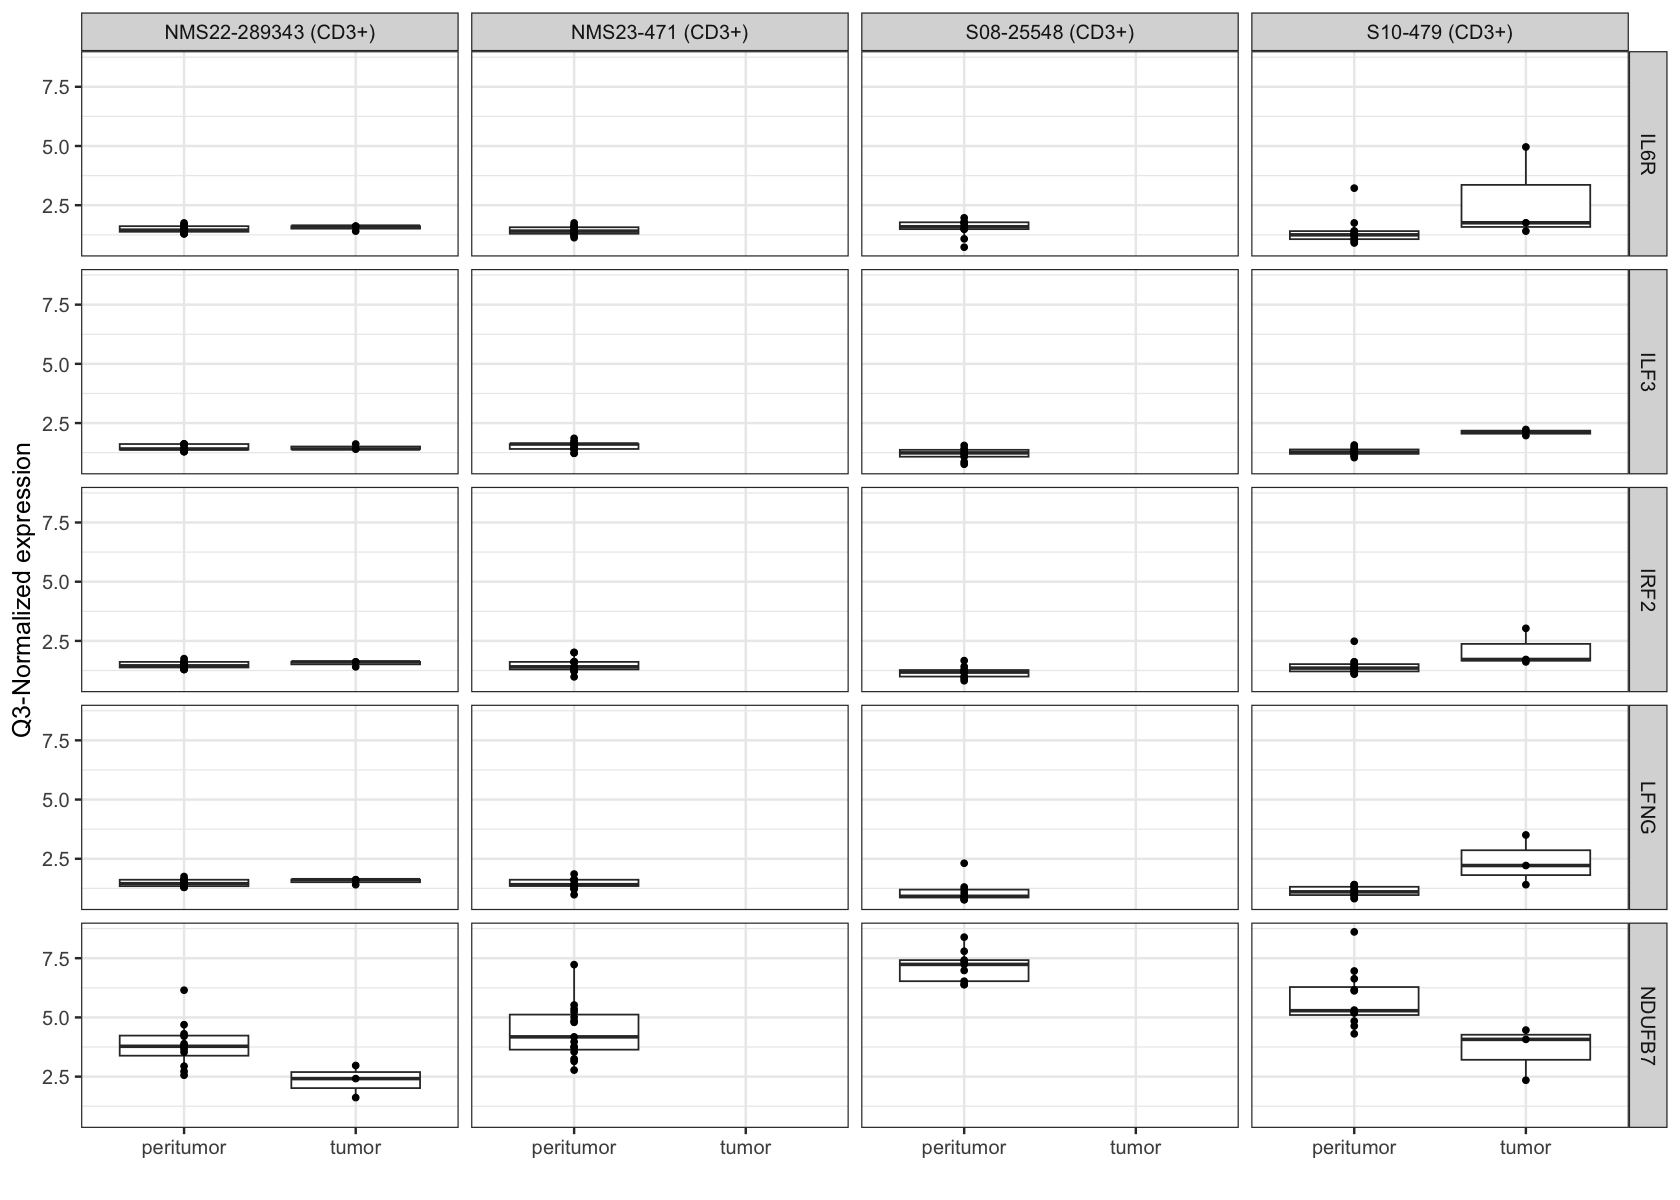

In [24]:
options(repr.plot.width=14, repr.plot.height=10)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('NDUFB7', 'LFNG', 'ILF3', 'IL6R', 'IRF2'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

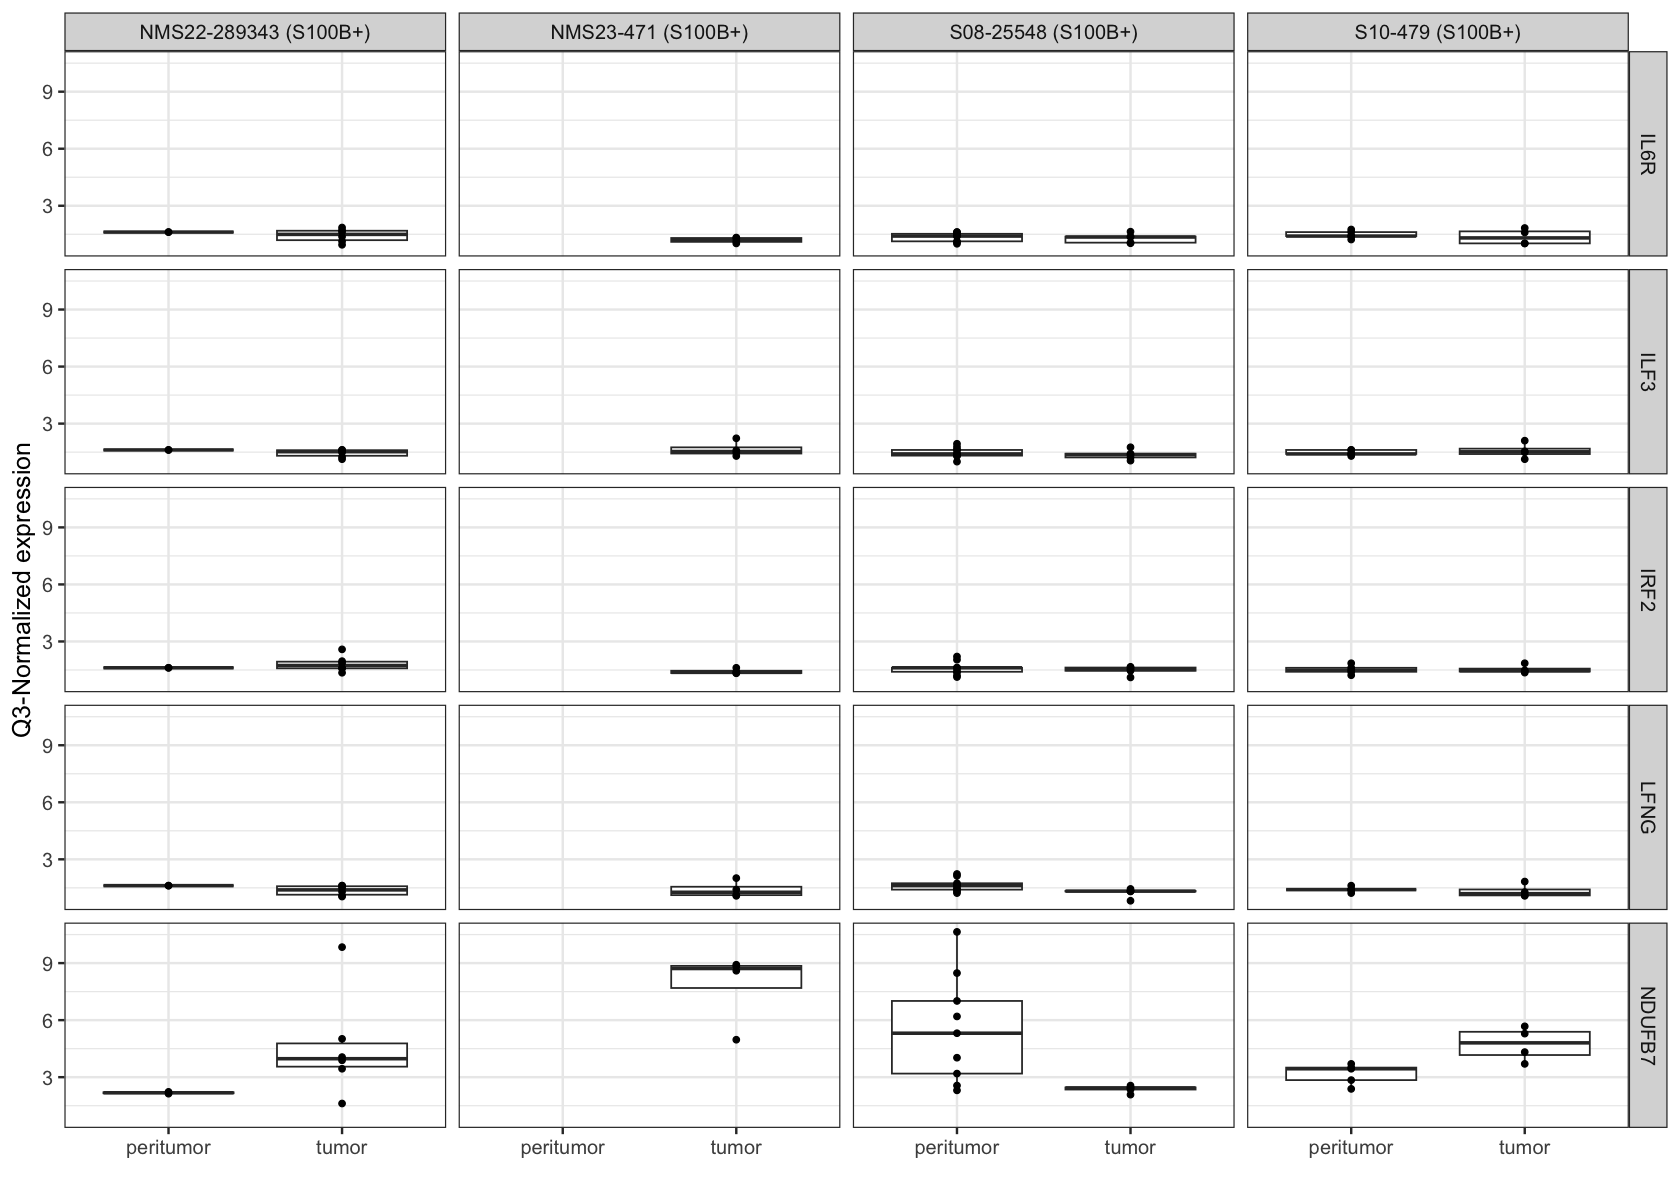

In [25]:
options(repr.plot.width=14, repr.plot.height=10)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('NDUFB7', 'LFNG', 'ILF3', 'IL6R', 'IRF2'),
        `marker` == 'S100B'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

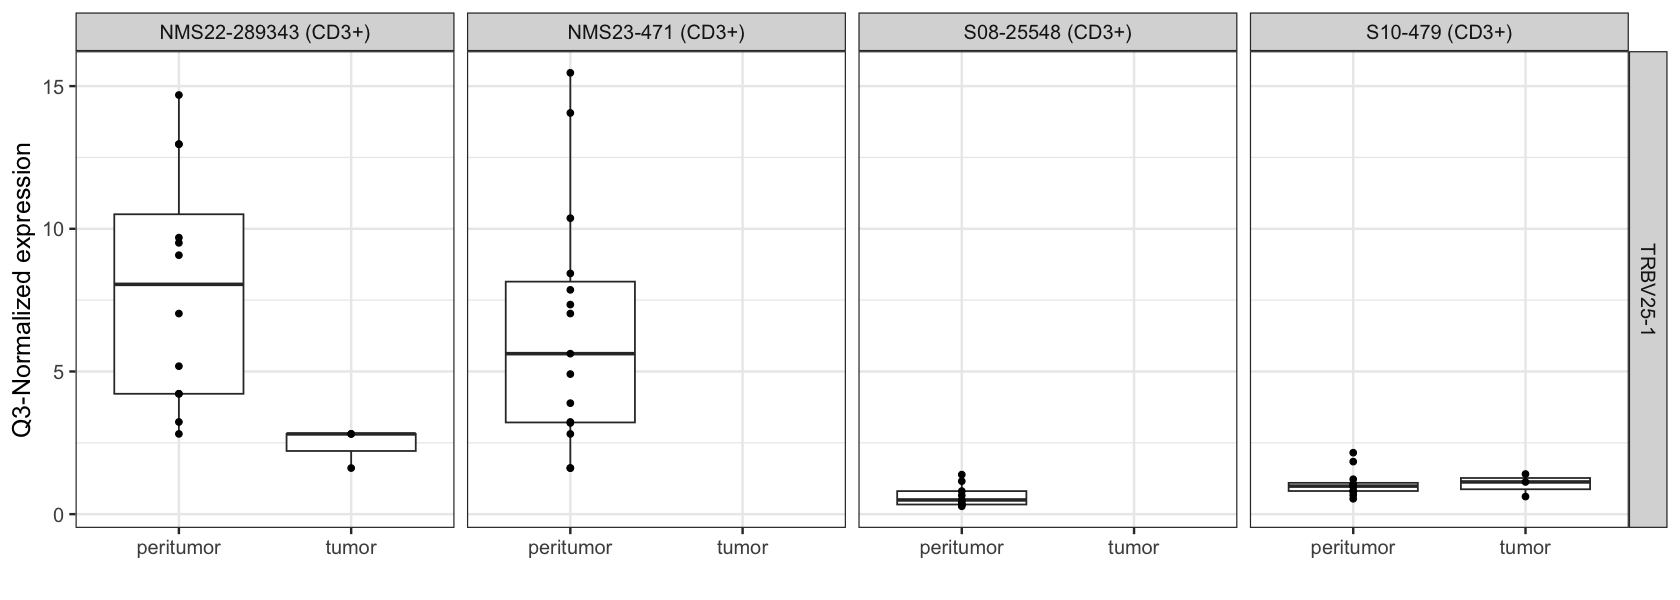

In [26]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TRBV25-1'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

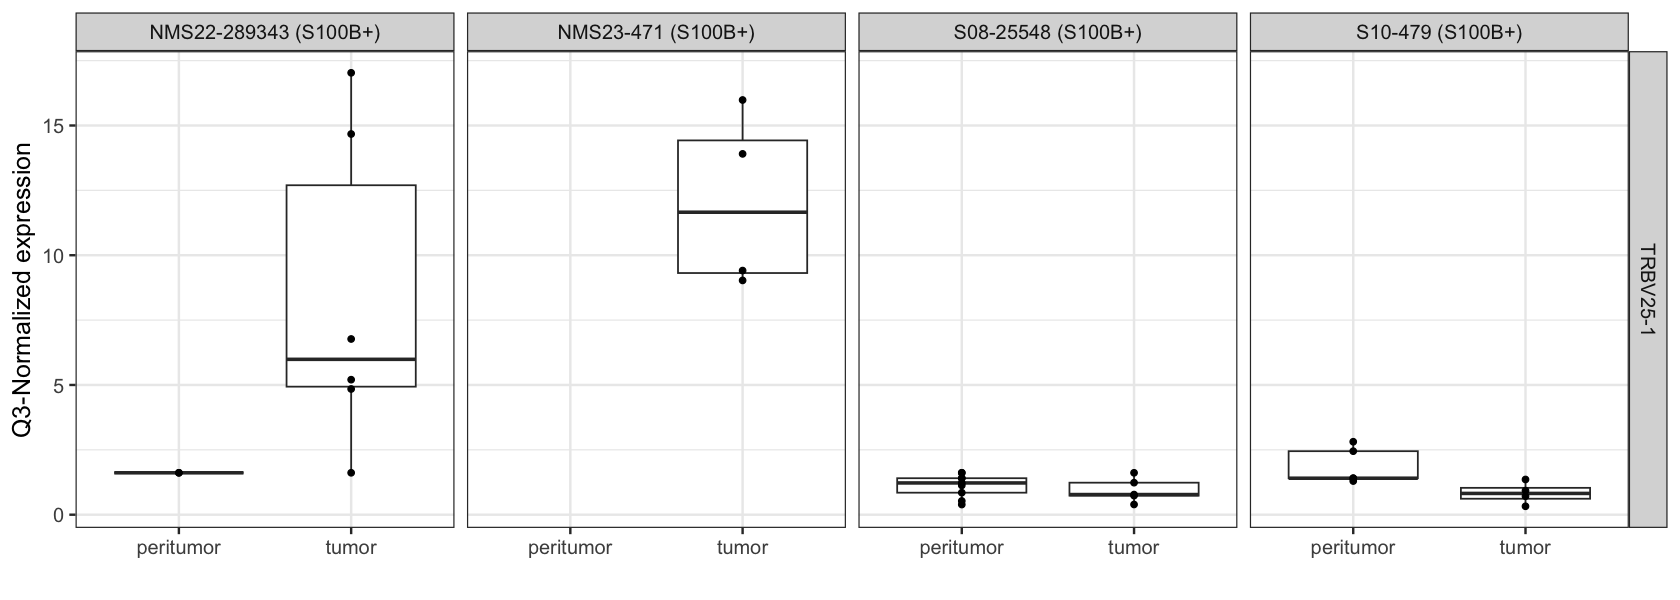

In [27]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TRBV25-1'),
        `marker` == 'S100B'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

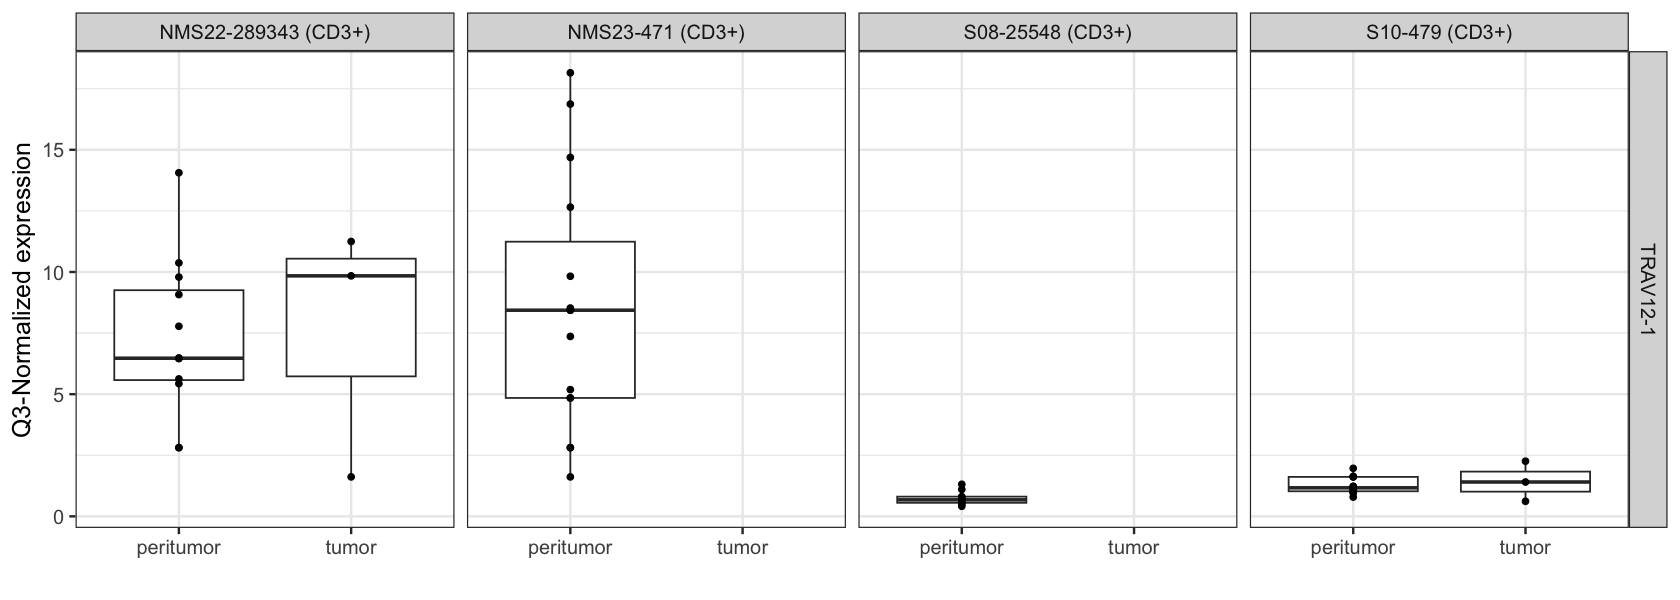

In [28]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TRAV12-1'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

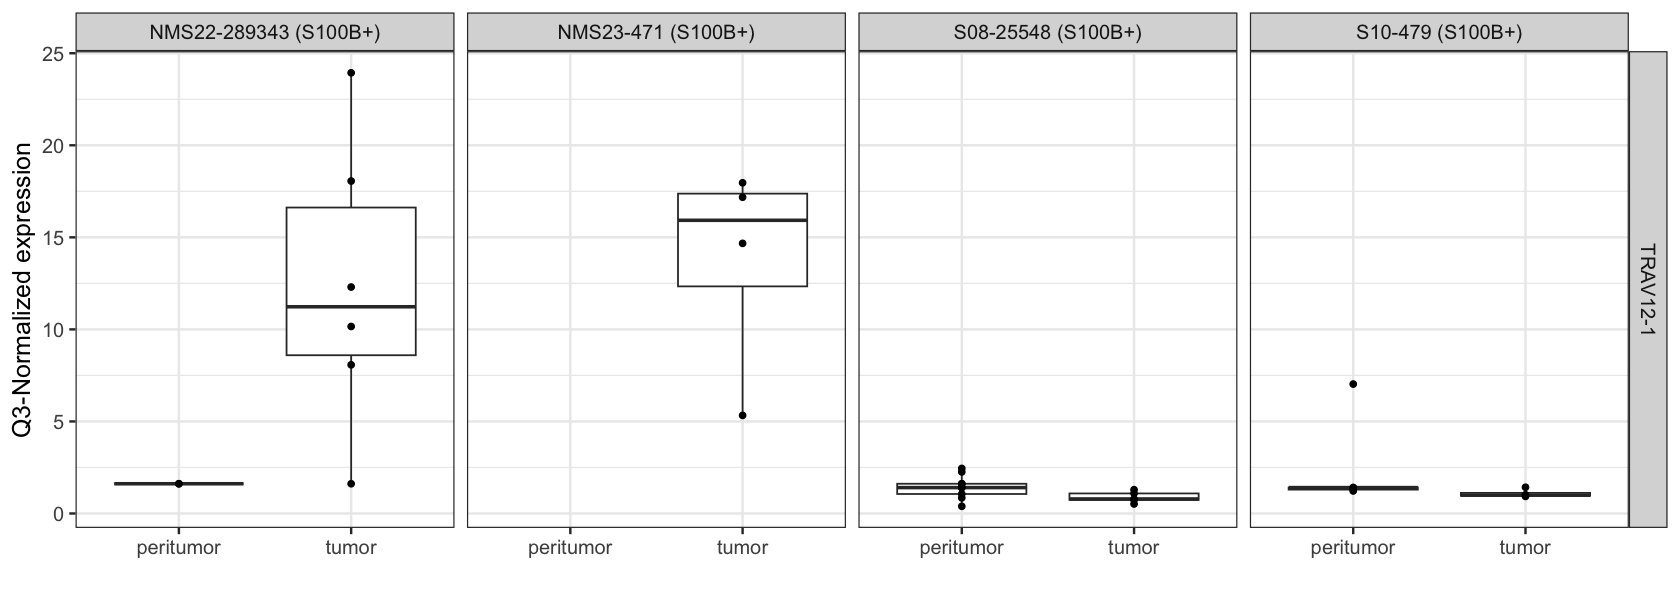

In [29]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TRAV12-1'),
        `marker` == 'S100B'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

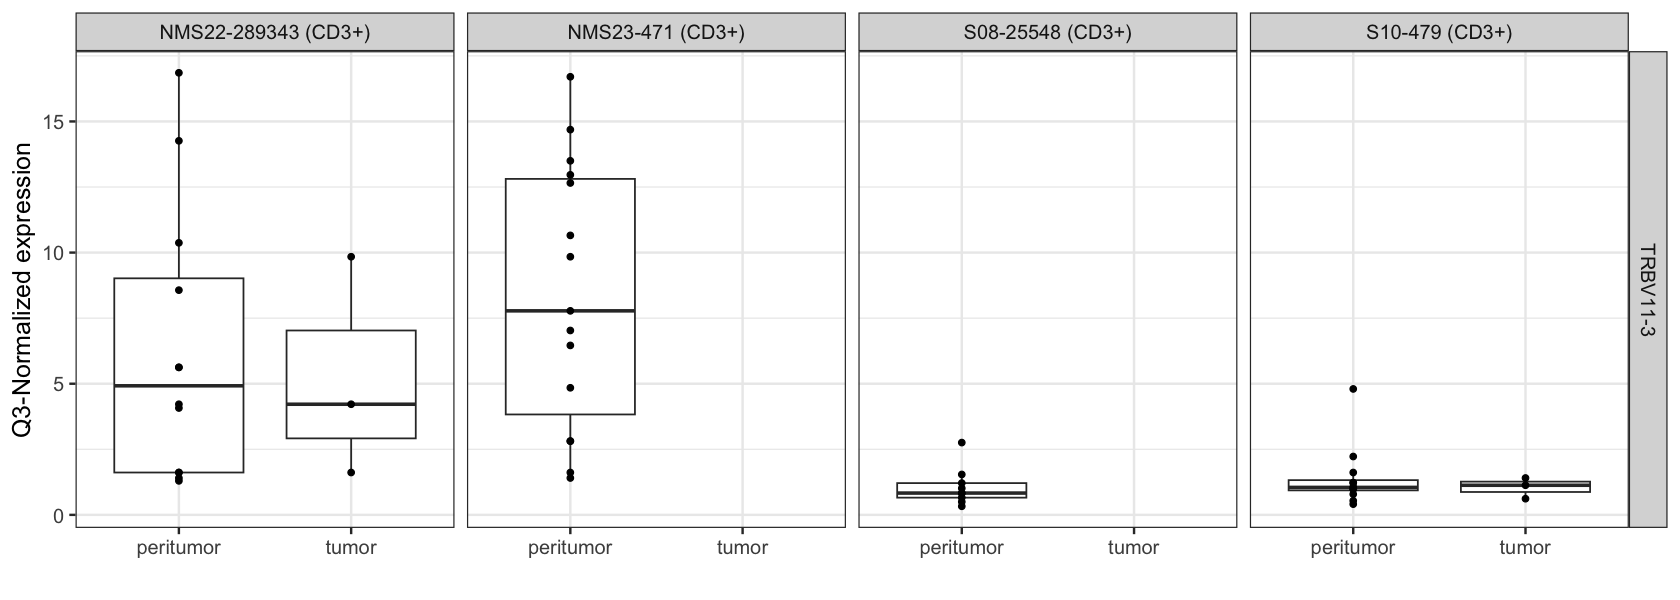

In [30]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TRBV11-3'),
        `marker` == 'CD3'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

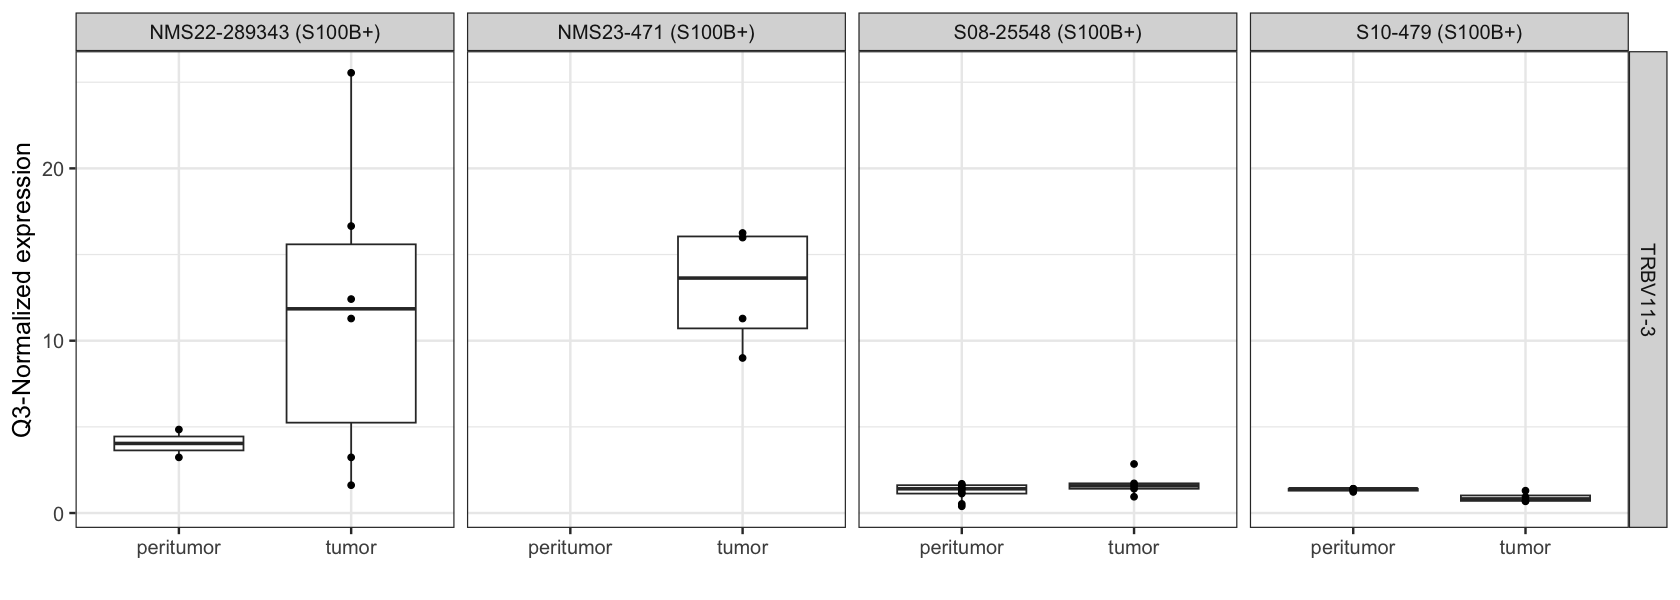

In [31]:
options(repr.plot.width=14, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TRBV11-3'),
        `marker` == 'S100B'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point() +
        facet_grid(`gene_symbol`~paste(`sample_name`, ' (', `marker`, '+)', sep='')) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression'
        )

options(org_opts)

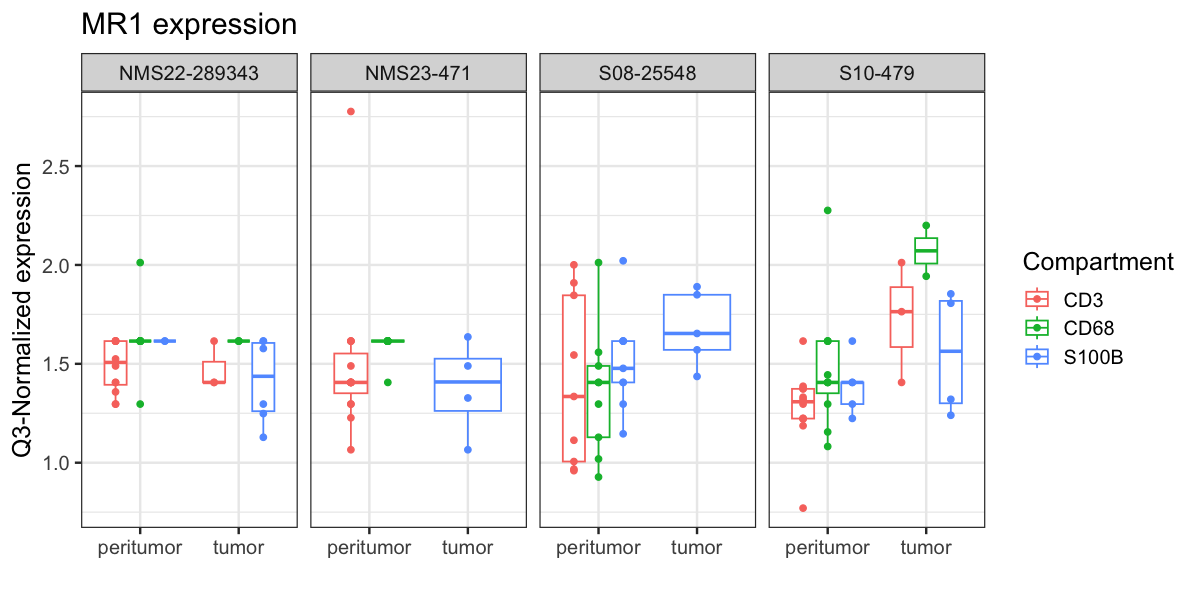

In [32]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('MR1')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='MR1 expression'
        )

options(org_opts)

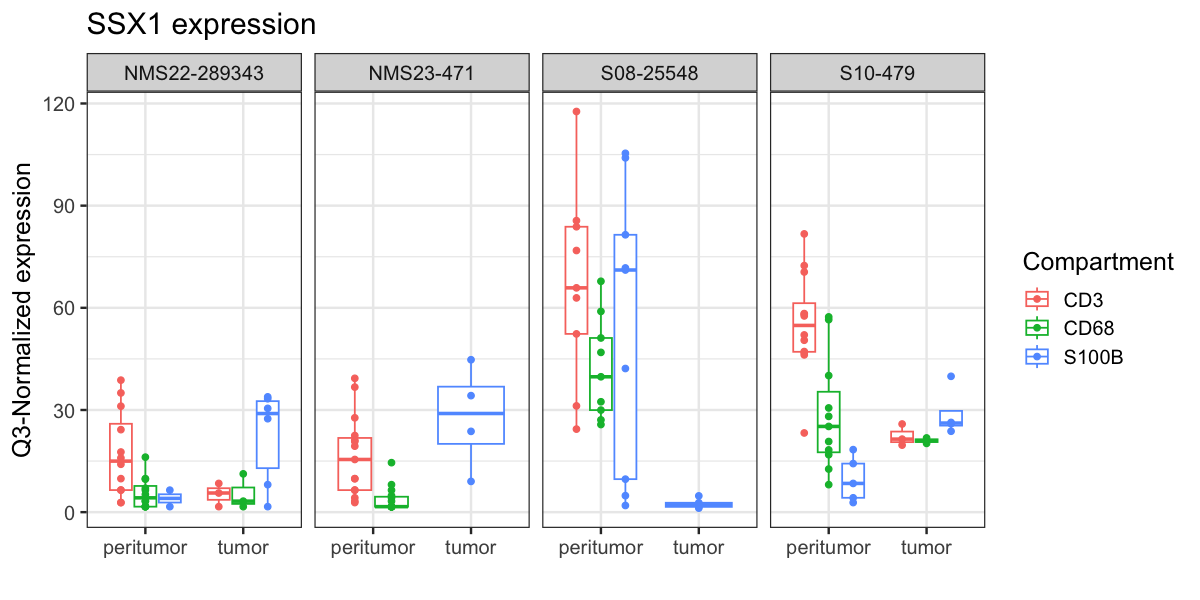

In [33]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('SSX1')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='SSX1 expression'
        )

options(org_opts)

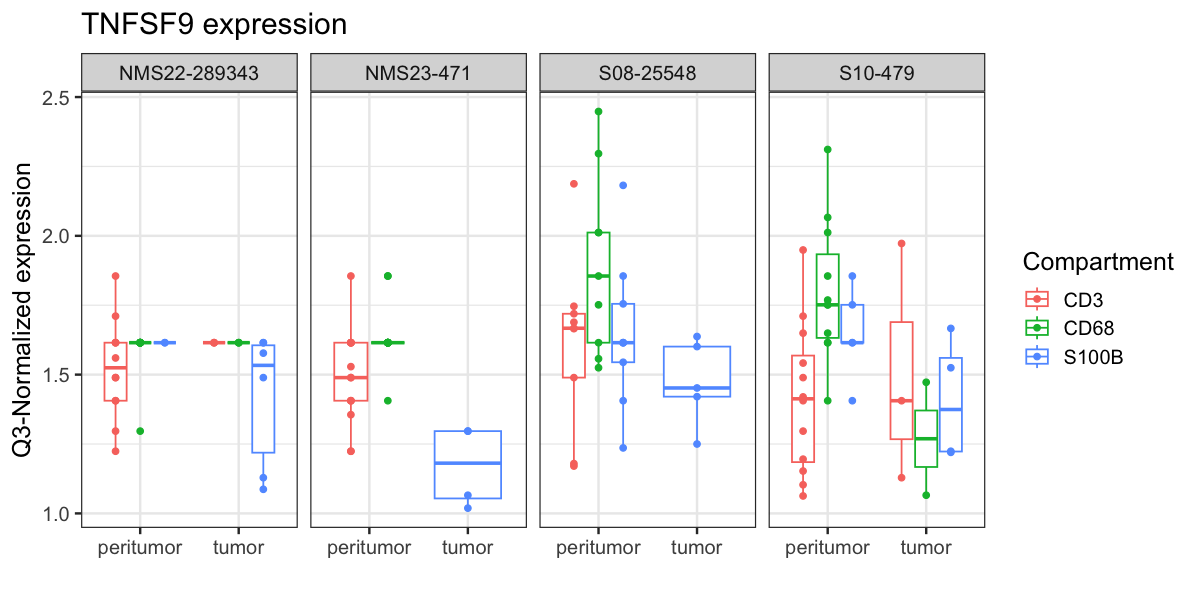

In [34]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TNFSF9')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='TNFSF9 expression'
        )

options(org_opts)

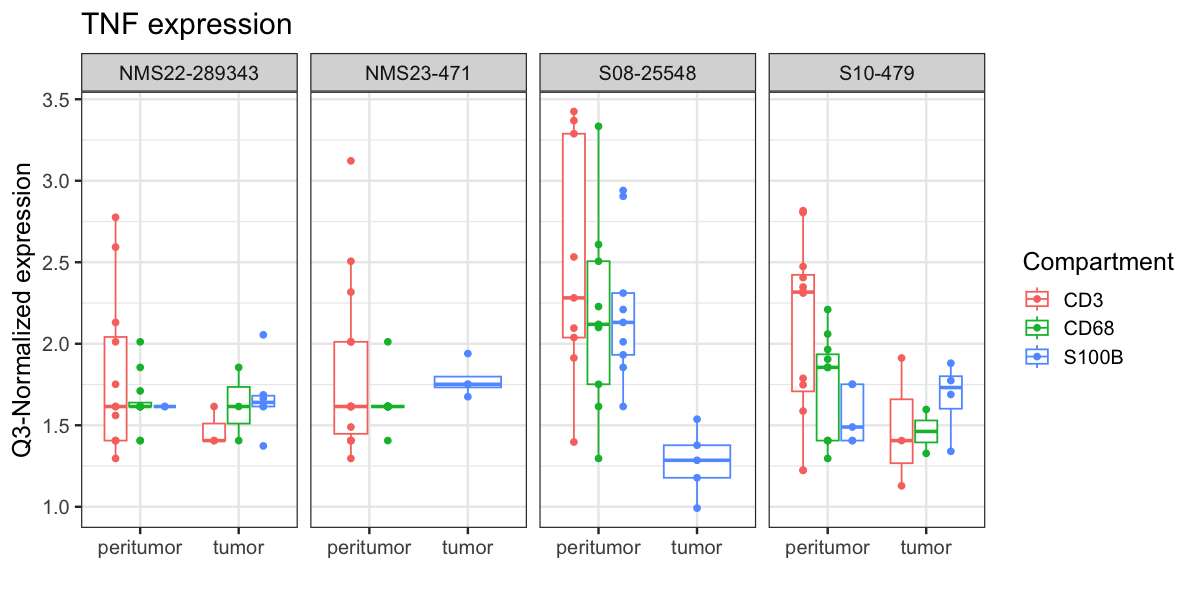

In [35]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('TNF')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='TNF expression'
        )

options(org_opts)

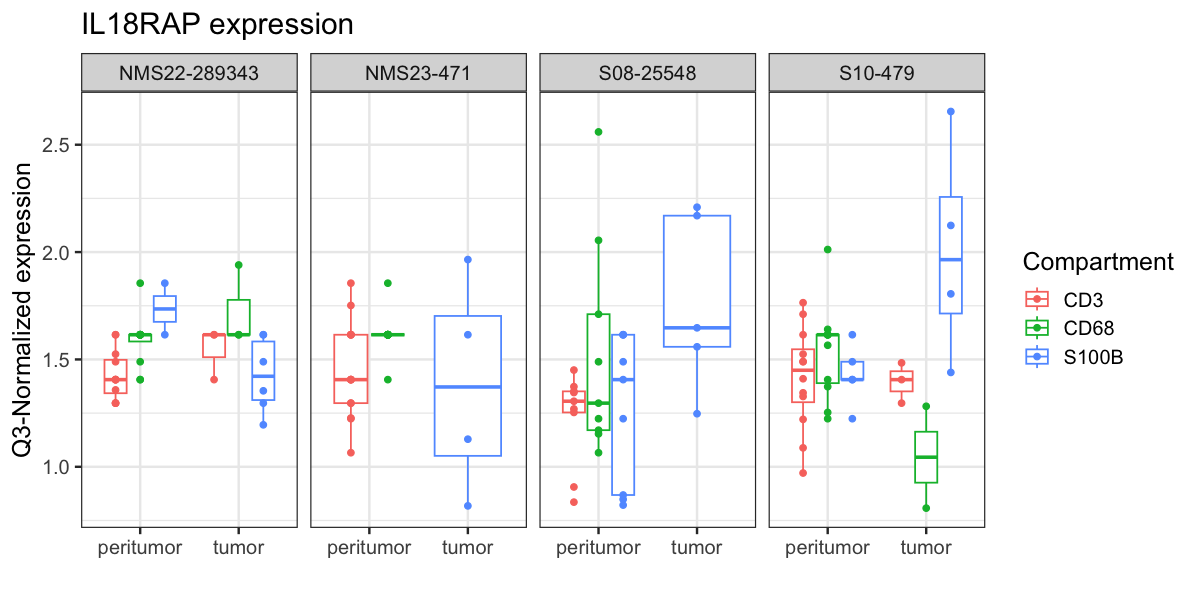

In [36]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('IL18RAP')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='IL18RAP expression'
        )

options(org_opts)

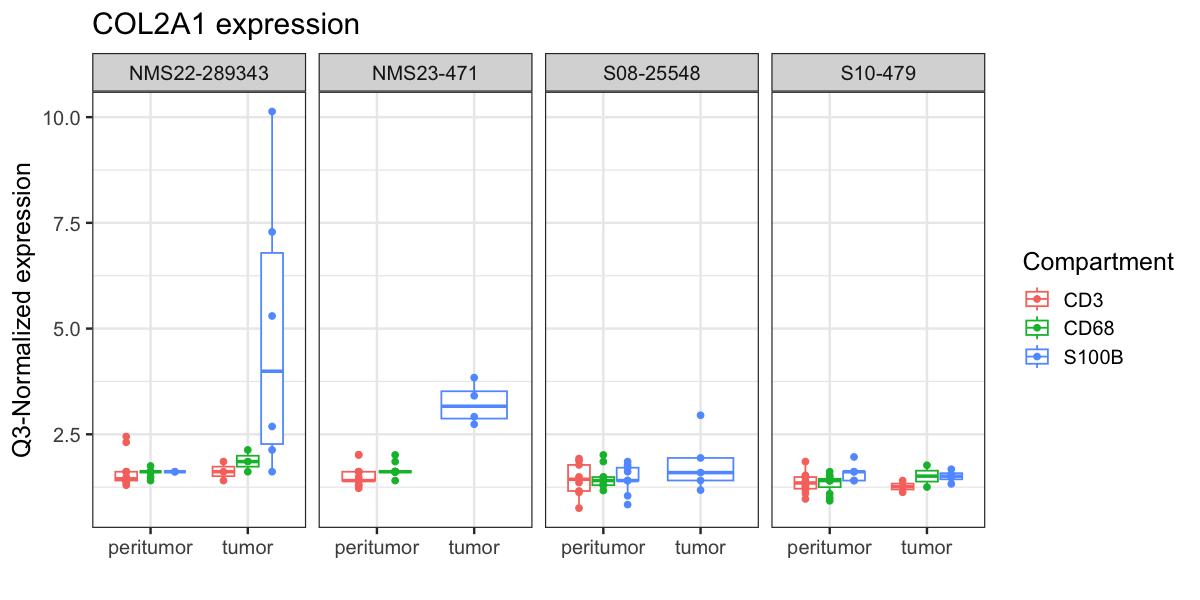

In [37]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('COL2A1')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='COL2A1 expression'
        )

options(org_opts)

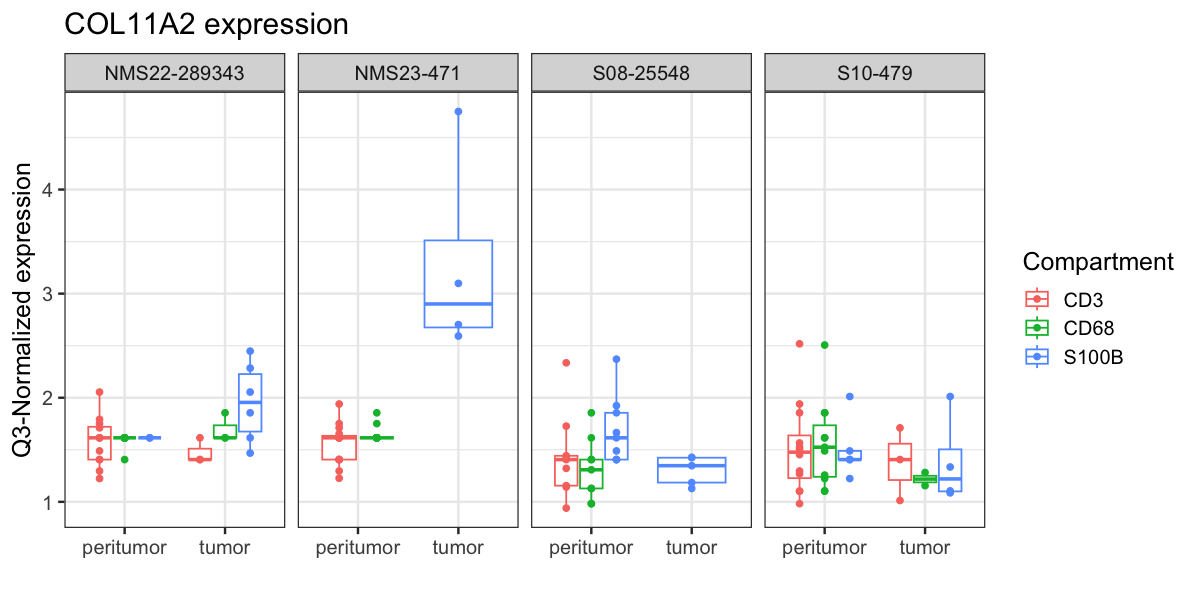

In [38]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('COL11A2')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='COL11A2 expression'
        )

options(org_opts)

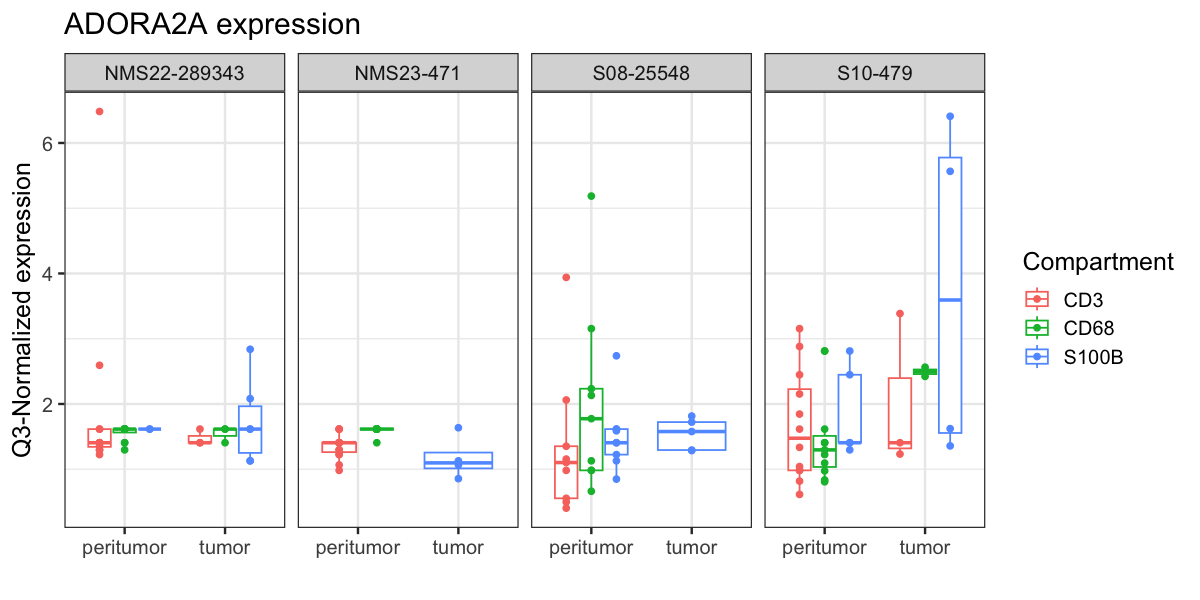

In [39]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('ADORA2A')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='ADORA2A expression'
        )

options(org_opts)

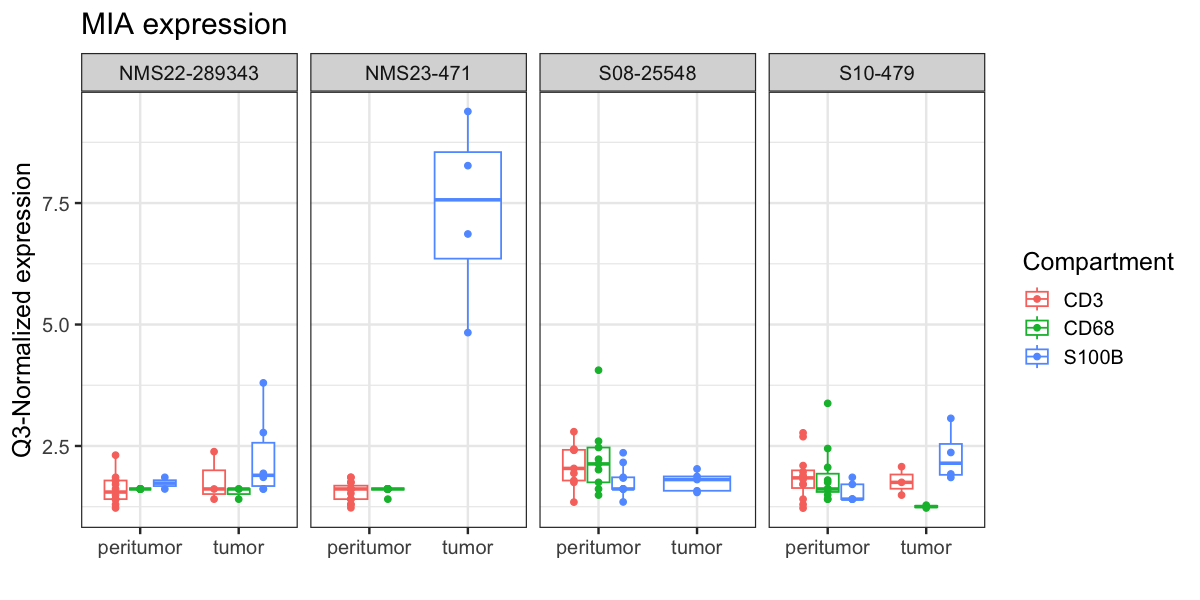

In [40]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('MIA')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='MIA expression'
        )

options(org_opts)

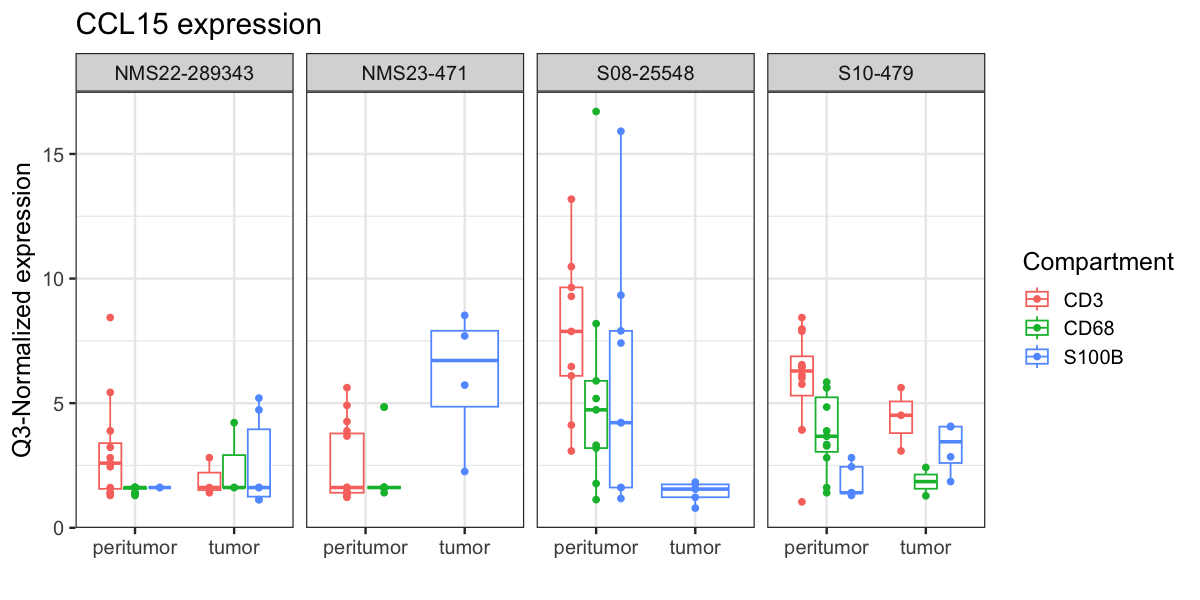

In [41]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('CCL15')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='CCL15 expression'
        )

options(org_opts)

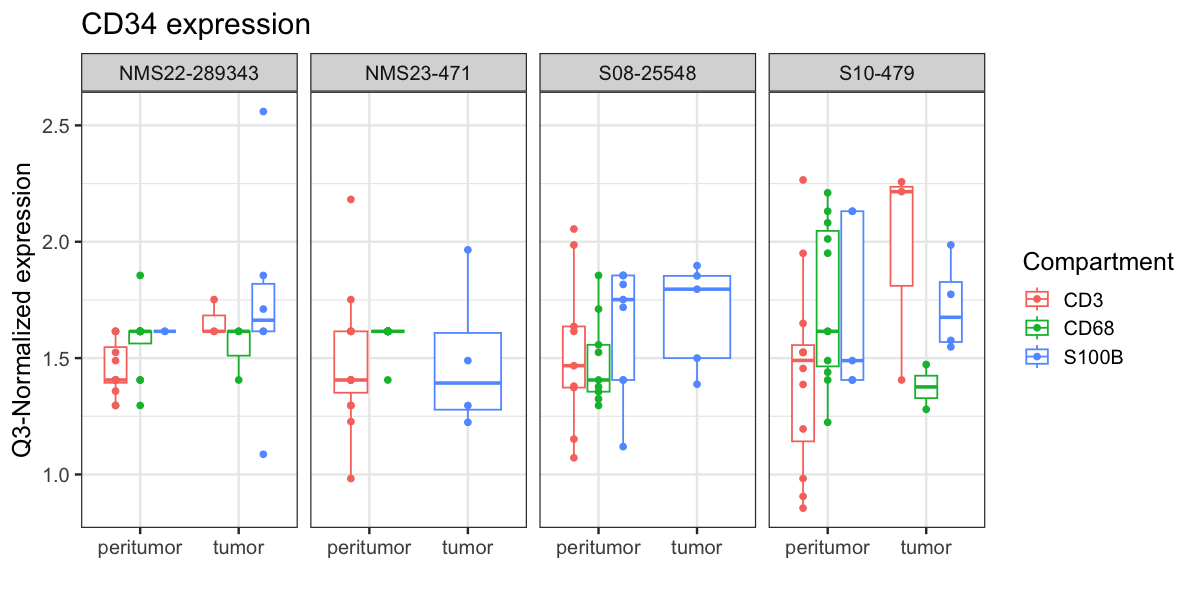

In [42]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('CD34')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='CD34 expression'
        )

options(org_opts)

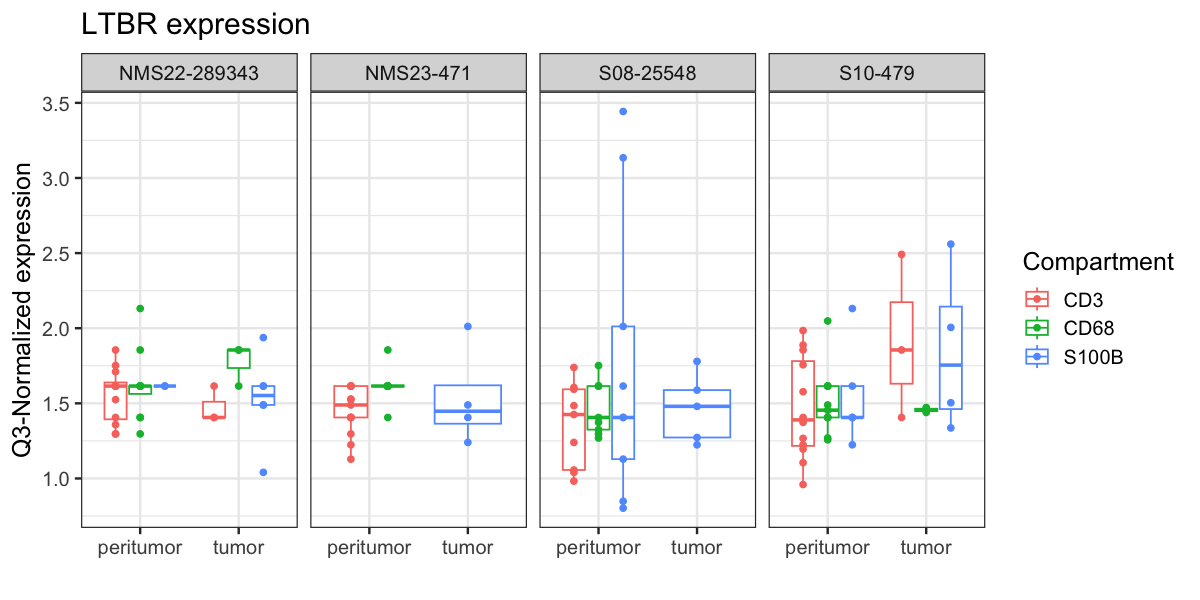

In [43]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('LTBR')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='LTBR expression'
        )

options(org_opts)

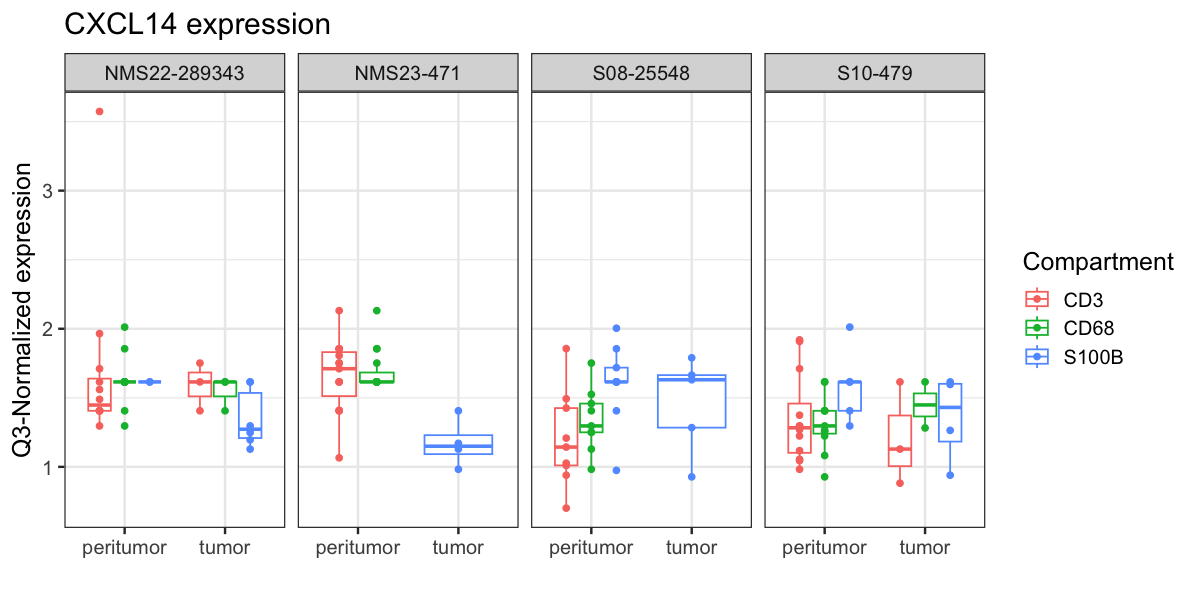

In [44]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('CXCL14')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~sample_name, ncol=4) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='CXCL14 expression'
        )

options(org_opts)

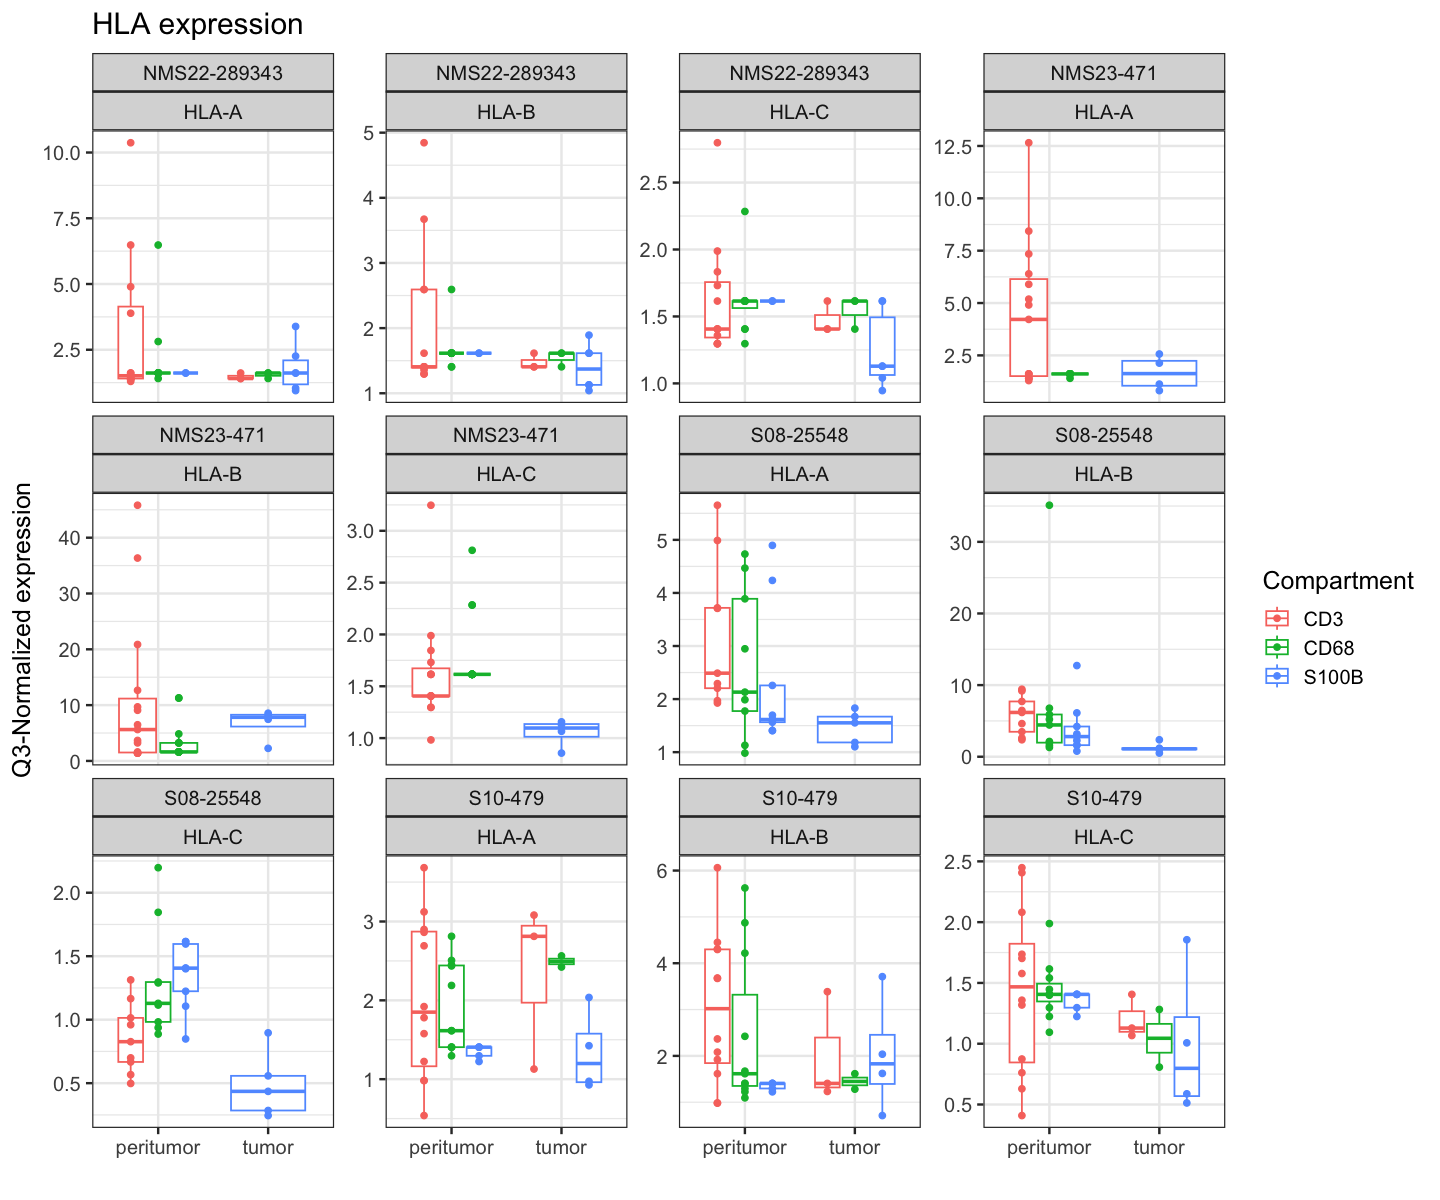

In [45]:
options(repr.plot.width=12, repr.plot.height=10)

exp_tbl %>%
    filter(
        `gene_symbol` %in% c('HLA-A', 'HLA-B', 'HLA-C')
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~`sample_name`+`gene_symbol`, ncol=4, scale='free_y') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='HLA expression'
        )

options(org_opts)

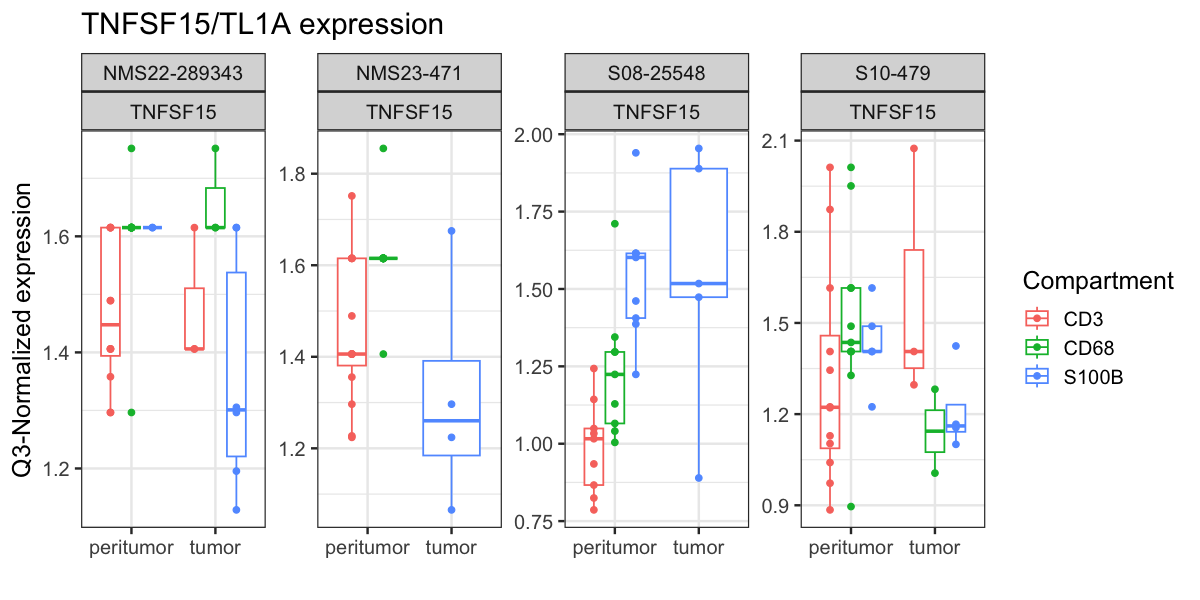

In [48]:
options(repr.plot.width=10, repr.plot.height=5)

exp_tbl %>%
    filter(
        `gene_symbol` == 'TNFSF15'
    ) %>%
    ggplot(aes(x=`region_type`, y=`norm_exp`, color=`marker`)) +
        geom_boxplot(outlier.shape=NA) +
        geom_point(position=position_dodge(width=.75)) +
        facet_wrap(~`sample_name`+`gene_symbol`, ncol=4, scale='free_y') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Q3-Normalized expression',
            color='Compartment',
            title='TNFSF15/TL1A expression'
        )

options(org_opts)